# Traffic Sign Detection Using Deep Learning

- Traffic-sign recognition (TSR) is a technology by which a vehicle is able to recognize the traffic signs put on the road e.g. "speed limit" or "children" or "turn ahead".
- For an Automatic Cars the detection of the Road Signs becomes a Crusial Stuff. The technology is being developed by a variety of automotive suppliers. It uses image processing techniques to detect the traffic signs. The detection methods can be generally divided into color based, shape based and learning based methods. 
- So in this project we are going to develop a Deep Learning model to detect Traffic Signs.

# Dataset Description

- The dataset consists of 43 classes.
- The dataset is distributed in 43 Folders where each folder consist of around 100 images for training.

# 1. Importing Dependencies

In [1]:
# Importing Basic Libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Importing Keras Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Importing Other Libraries
from PyQt5 import QtCore, QtGui, QtWidgets
import os
from sklearn.model_selection import train_test_split

# 2. Data Preprocessing & Analysis

In [3]:
# Defining Some Variables & Lists
data = []
labels = []
classes = 43
cur_path = os.getcwd() # To get current working directory

In [4]:
# Defining Classes
classs = { 1:"Speed limit (20km/h)",
    2:"Speed limit (30km/h)",
    3:"Speed limit (50km/h)",
    4:"Speed limit (60km/h)",
    5:"Speed limit (70km/h)",
    6:"Speed limit (80km/h)",
    7:"End of speed limit (80km/h)",
    8:"Speed limit (100km/h)",
    9:"Speed limit (120km/h)",
    10:"No passing",
    11:"No passing veh over 3.5 tons",
    12:"Right-of-way at intersection",
    13:"Priority road",
    14:"Yield",
    15:"Stop",
    16:"No vehicles",
    17:"Veh > 3.5 tons prohibited",
    18:"No entry",
    19:"General caution",
    20:"Dangerous curve left",
    21:"Dangerous curve right",
    22:"Double curve",
    23:"Bumpy road",
    24:"Slippery road",
    25:"Road narrows on the right",
    26:"Road work",
    27:"Traffic signals",
    28:"Pedestrians",
    29:"Children crossing",
    30:"Bicycles crossing",
    31:"Beware of ice/snow",
    32:"Wild animals crossing",
    33:"End speed + passing limits",
    34:"Turn right ahead",
    35:"Turn left ahead",
    36:"Ahead only",
    37:"Go straight or right",
    38:"Go straight or left",
    39:"Keep right",
    40:"Keep left",
    41:"Roundabout mandatory",
    42:"End of no passing",
    43:"End no passing veh > 3.5 tons" }


# Retrieving the images and their labels
print("Obtaining Images & Their Labels : ")

for i in range(classes):
    path = os.path.join(cur_path,'dataset/train/',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
            print("Image {0} Loaded.".format(a))
        except:
            print("Error loading image")
            
print("Dataset Loading Successful.")

Obtaining Images & Their Labels : 
Image 00000_00000_00000.png Loaded.
Image 00000_00000_00001.png Loaded.
Image 00000_00000_00002.png Loaded.
Image 00000_00000_00003.png Loaded.
Image 00000_00000_00004.png Loaded.
Image 00000_00000_00005.png Loaded.
Image 00000_00000_00006.png Loaded.
Image 00000_00000_00007.png Loaded.
Image 00000_00000_00008.png Loaded.
Image 00000_00000_00009.png Loaded.
Image 00000_00000_00010.png Loaded.
Image 00000_00000_00011.png Loaded.
Image 00000_00000_00012.png Loaded.
Image 00000_00000_00013.png Loaded.
Image 00000_00000_00014.png Loaded.
Image 00000_00000_00015.png Loaded.
Image 00000_00000_00016.png Loaded.
Image 00000_00000_00017.png Loaded.
Image 00000_00000_00018.png Loaded.
Image 00000_00000_00019.png Loaded.
Image 00000_00000_00020.png Loaded.
Image 00000_00000_00021.png Loaded.
Image 00000_00000_00022.png Loaded.
Image 00000_00000_00023.png Loaded.
Image 00000_00000_00024.png Loaded.
Image 00000_00000_00025.png Loaded.
Image 00000_00000_00026.png L

Image 00001_00002_00012.png Loaded.
Image 00001_00002_00013.png Loaded.
Image 00001_00002_00014.png Loaded.
Image 00001_00002_00015.png Loaded.
Image 00001_00002_00016.png Loaded.
Image 00001_00002_00017.png Loaded.
Image 00001_00002_00018.png Loaded.
Image 00001_00002_00019.png Loaded.
Image 00001_00002_00020.png Loaded.
Image 00001_00002_00021.png Loaded.
Image 00001_00002_00022.png Loaded.
Image 00001_00002_00023.png Loaded.
Image 00001_00002_00024.png Loaded.
Image 00001_00002_00025.png Loaded.
Image 00001_00002_00026.png Loaded.
Image 00001_00002_00027.png Loaded.
Image 00001_00002_00028.png Loaded.
Image 00001_00002_00029.png Loaded.
Image 00001_00003_00000.png Loaded.
Image 00001_00003_00001.png Loaded.
Image 00001_00003_00002.png Loaded.
Image 00001_00003_00003.png Loaded.
Image 00001_00003_00004.png Loaded.
Image 00001_00003_00005.png Loaded.
Image 00001_00003_00006.png Loaded.
Image 00001_00003_00007.png Loaded.
Image 00001_00003_00008.png Loaded.
Image 00001_00003_00009.png 

Image 00001_00010_00027.png Loaded.
Image 00001_00010_00028.png Loaded.
Image 00001_00010_00029.png Loaded.
Image 00001_00011_00000.png Loaded.
Image 00001_00011_00001.png Loaded.
Image 00001_00011_00002.png Loaded.
Image 00001_00011_00003.png Loaded.
Image 00001_00011_00004.png Loaded.
Image 00001_00011_00005.png Loaded.
Image 00001_00011_00006.png Loaded.
Image 00001_00011_00007.png Loaded.
Image 00001_00011_00008.png Loaded.
Image 00001_00011_00009.png Loaded.
Image 00001_00011_00010.png Loaded.
Image 00001_00011_00011.png Loaded.
Image 00001_00011_00012.png Loaded.
Image 00001_00011_00013.png Loaded.
Image 00001_00011_00014.png Loaded.
Image 00001_00011_00015.png Loaded.
Image 00001_00011_00016.png Loaded.
Image 00001_00011_00017.png Loaded.
Image 00001_00011_00018.png Loaded.
Image 00001_00011_00019.png Loaded.
Image 00001_00011_00020.png Loaded.
Image 00001_00011_00021.png Loaded.
Image 00001_00011_00022.png Loaded.
Image 00001_00011_00023.png Loaded.
Image 00001_00011_00024.png 

Image 00001_00019_00009.png Loaded.
Image 00001_00019_00010.png Loaded.
Image 00001_00019_00011.png Loaded.
Image 00001_00019_00012.png Loaded.
Image 00001_00019_00013.png Loaded.
Image 00001_00019_00014.png Loaded.
Image 00001_00019_00015.png Loaded.
Image 00001_00019_00016.png Loaded.
Image 00001_00019_00017.png Loaded.
Image 00001_00019_00018.png Loaded.
Image 00001_00019_00019.png Loaded.
Image 00001_00019_00020.png Loaded.
Image 00001_00019_00021.png Loaded.
Image 00001_00019_00022.png Loaded.
Image 00001_00019_00023.png Loaded.
Image 00001_00019_00024.png Loaded.
Image 00001_00019_00025.png Loaded.
Image 00001_00019_00026.png Loaded.
Image 00001_00019_00027.png Loaded.
Image 00001_00019_00028.png Loaded.
Image 00001_00019_00029.png Loaded.
Image 00001_00020_00000.png Loaded.
Image 00001_00020_00001.png Loaded.
Image 00001_00020_00002.png Loaded.
Image 00001_00020_00003.png Loaded.
Image 00001_00020_00004.png Loaded.
Image 00001_00020_00005.png Loaded.
Image 00001_00020_00006.png 

Image 00001_00027_00027.png Loaded.
Image 00001_00027_00028.png Loaded.
Image 00001_00027_00029.png Loaded.
Image 00001_00028_00000.png Loaded.
Image 00001_00028_00001.png Loaded.
Image 00001_00028_00002.png Loaded.
Image 00001_00028_00003.png Loaded.
Image 00001_00028_00004.png Loaded.
Image 00001_00028_00005.png Loaded.
Image 00001_00028_00006.png Loaded.
Image 00001_00028_00007.png Loaded.
Image 00001_00028_00008.png Loaded.
Image 00001_00028_00009.png Loaded.
Image 00001_00028_00010.png Loaded.
Image 00001_00028_00011.png Loaded.
Image 00001_00028_00012.png Loaded.
Image 00001_00028_00013.png Loaded.
Image 00001_00028_00014.png Loaded.
Image 00001_00028_00015.png Loaded.
Image 00001_00028_00016.png Loaded.
Image 00001_00028_00017.png Loaded.
Image 00001_00028_00018.png Loaded.
Image 00001_00028_00019.png Loaded.
Image 00001_00028_00020.png Loaded.
Image 00001_00028_00021.png Loaded.
Image 00001_00028_00022.png Loaded.
Image 00001_00028_00023.png Loaded.
Image 00001_00028_00024.png 

Image 00001_00036_00011.png Loaded.
Image 00001_00036_00012.png Loaded.
Image 00001_00036_00013.png Loaded.
Image 00001_00036_00014.png Loaded.
Image 00001_00036_00015.png Loaded.
Image 00001_00036_00016.png Loaded.
Image 00001_00036_00017.png Loaded.
Image 00001_00036_00018.png Loaded.
Image 00001_00036_00019.png Loaded.
Image 00001_00036_00020.png Loaded.
Image 00001_00036_00021.png Loaded.
Image 00001_00036_00022.png Loaded.
Image 00001_00036_00023.png Loaded.
Image 00001_00036_00024.png Loaded.
Image 00001_00036_00025.png Loaded.
Image 00001_00036_00026.png Loaded.
Image 00001_00036_00027.png Loaded.
Image 00001_00036_00028.png Loaded.
Image 00001_00036_00029.png Loaded.
Image 00001_00037_00000.png Loaded.
Image 00001_00037_00001.png Loaded.
Image 00001_00037_00002.png Loaded.
Image 00001_00037_00003.png Loaded.
Image 00001_00037_00004.png Loaded.
Image 00001_00037_00005.png Loaded.
Image 00001_00037_00006.png Loaded.
Image 00001_00037_00007.png Loaded.
Image 00001_00037_00008.png 

Image 00001_00044_00002.png Loaded.
Image 00001_00044_00003.png Loaded.
Image 00001_00044_00004.png Loaded.
Image 00001_00044_00005.png Loaded.
Image 00001_00044_00006.png Loaded.
Image 00001_00044_00007.png Loaded.
Image 00001_00044_00008.png Loaded.
Image 00001_00044_00009.png Loaded.
Image 00001_00044_00010.png Loaded.
Image 00001_00044_00011.png Loaded.
Image 00001_00044_00012.png Loaded.
Image 00001_00044_00013.png Loaded.
Image 00001_00044_00014.png Loaded.
Image 00001_00044_00015.png Loaded.
Image 00001_00044_00016.png Loaded.
Image 00001_00044_00017.png Loaded.
Image 00001_00044_00018.png Loaded.
Image 00001_00044_00019.png Loaded.
Image 00001_00044_00020.png Loaded.
Image 00001_00044_00021.png Loaded.
Image 00001_00044_00022.png Loaded.
Image 00001_00044_00023.png Loaded.
Image 00001_00044_00024.png Loaded.
Image 00001_00044_00025.png Loaded.
Image 00001_00044_00026.png Loaded.
Image 00001_00044_00027.png Loaded.
Image 00001_00044_00028.png Loaded.
Image 00001_00044_00029.png 

Image 00001_00052_00002.png Loaded.
Image 00001_00052_00003.png Loaded.
Image 00001_00052_00004.png Loaded.
Image 00001_00052_00005.png Loaded.
Image 00001_00052_00006.png Loaded.
Image 00001_00052_00007.png Loaded.
Image 00001_00052_00008.png Loaded.
Image 00001_00052_00009.png Loaded.
Image 00001_00052_00010.png Loaded.
Image 00001_00052_00011.png Loaded.
Image 00001_00052_00012.png Loaded.
Image 00001_00052_00013.png Loaded.
Image 00001_00052_00014.png Loaded.
Image 00001_00052_00015.png Loaded.
Image 00001_00052_00016.png Loaded.
Image 00001_00052_00017.png Loaded.
Image 00001_00052_00018.png Loaded.
Image 00001_00052_00019.png Loaded.
Image 00001_00052_00020.png Loaded.
Image 00001_00052_00021.png Loaded.
Image 00001_00052_00022.png Loaded.
Image 00001_00052_00023.png Loaded.
Image 00001_00052_00024.png Loaded.
Image 00001_00052_00025.png Loaded.
Image 00001_00052_00026.png Loaded.
Image 00001_00052_00027.png Loaded.
Image 00001_00052_00028.png Loaded.
Image 00001_00052_00029.png 

Image 00001_00060_00026.png Loaded.
Image 00001_00060_00027.png Loaded.
Image 00001_00060_00028.png Loaded.
Image 00001_00060_00029.png Loaded.
Image 00001_00061_00000.png Loaded.
Image 00001_00061_00001.png Loaded.
Image 00001_00061_00002.png Loaded.
Image 00001_00061_00003.png Loaded.
Image 00001_00061_00004.png Loaded.
Image 00001_00061_00005.png Loaded.
Image 00001_00061_00006.png Loaded.
Image 00001_00061_00007.png Loaded.
Image 00001_00061_00008.png Loaded.
Image 00001_00061_00009.png Loaded.
Image 00001_00061_00010.png Loaded.
Image 00001_00061_00011.png Loaded.
Image 00001_00061_00012.png Loaded.
Image 00001_00061_00013.png Loaded.
Image 00001_00061_00014.png Loaded.
Image 00001_00061_00015.png Loaded.
Image 00001_00061_00016.png Loaded.
Image 00001_00061_00017.png Loaded.
Image 00001_00061_00018.png Loaded.
Image 00001_00061_00019.png Loaded.
Image 00001_00061_00020.png Loaded.
Image 00001_00061_00021.png Loaded.
Image 00001_00061_00022.png Loaded.
Image 00001_00061_00023.png 

Image 00001_00069_00023.png Loaded.
Image 00001_00069_00024.png Loaded.
Image 00001_00069_00025.png Loaded.
Image 00001_00069_00026.png Loaded.
Image 00001_00069_00027.png Loaded.
Image 00001_00069_00028.png Loaded.
Image 00001_00069_00029.png Loaded.
Image 00001_00070_00000.png Loaded.
Image 00001_00070_00001.png Loaded.
Image 00001_00070_00002.png Loaded.
Image 00001_00070_00003.png Loaded.
Image 00001_00070_00004.png Loaded.
Image 00001_00070_00005.png Loaded.
Image 00001_00070_00006.png Loaded.
Image 00001_00070_00007.png Loaded.
Image 00001_00070_00008.png Loaded.
Image 00001_00070_00009.png Loaded.
Image 00001_00070_00010.png Loaded.
Image 00001_00070_00011.png Loaded.
Image 00001_00070_00012.png Loaded.
Image 00001_00070_00013.png Loaded.
Image 00001_00070_00014.png Loaded.
Image 00001_00070_00015.png Loaded.
Image 00001_00070_00016.png Loaded.
Image 00001_00070_00017.png Loaded.
Image 00001_00070_00018.png Loaded.
Image 00001_00070_00019.png Loaded.
Image 00001_00070_00020.png 

Image 00002_00003_00022.png Loaded.
Image 00002_00003_00023.png Loaded.
Image 00002_00003_00024.png Loaded.
Image 00002_00003_00025.png Loaded.
Image 00002_00003_00026.png Loaded.
Image 00002_00003_00027.png Loaded.
Image 00002_00003_00028.png Loaded.
Image 00002_00003_00029.png Loaded.
Image 00002_00004_00000.png Loaded.
Image 00002_00004_00001.png Loaded.
Image 00002_00004_00002.png Loaded.
Image 00002_00004_00003.png Loaded.
Image 00002_00004_00004.png Loaded.
Image 00002_00004_00005.png Loaded.
Image 00002_00004_00006.png Loaded.
Image 00002_00004_00007.png Loaded.
Image 00002_00004_00008.png Loaded.
Image 00002_00004_00009.png Loaded.
Image 00002_00004_00010.png Loaded.
Image 00002_00004_00011.png Loaded.
Image 00002_00004_00012.png Loaded.
Image 00002_00004_00013.png Loaded.
Image 00002_00004_00014.png Loaded.
Image 00002_00004_00015.png Loaded.
Image 00002_00004_00016.png Loaded.
Image 00002_00004_00017.png Loaded.
Image 00002_00004_00018.png Loaded.
Image 00002_00004_00019.png 

Image 00002_00012_00026.png Loaded.
Image 00002_00012_00027.png Loaded.
Image 00002_00012_00028.png Loaded.
Image 00002_00012_00029.png Loaded.
Image 00002_00013_00000.png Loaded.
Image 00002_00013_00001.png Loaded.
Image 00002_00013_00002.png Loaded.
Image 00002_00013_00003.png Loaded.
Image 00002_00013_00004.png Loaded.
Image 00002_00013_00005.png Loaded.
Image 00002_00013_00006.png Loaded.
Image 00002_00013_00007.png Loaded.
Image 00002_00013_00008.png Loaded.
Image 00002_00013_00009.png Loaded.
Image 00002_00013_00010.png Loaded.
Image 00002_00013_00011.png Loaded.
Image 00002_00013_00012.png Loaded.
Image 00002_00013_00013.png Loaded.
Image 00002_00013_00014.png Loaded.
Image 00002_00013_00015.png Loaded.
Image 00002_00013_00016.png Loaded.
Image 00002_00013_00017.png Loaded.
Image 00002_00013_00018.png Loaded.
Image 00002_00013_00019.png Loaded.
Image 00002_00013_00020.png Loaded.
Image 00002_00013_00021.png Loaded.
Image 00002_00013_00022.png Loaded.
Image 00002_00013_00023.png 

Image 00002_00021_00000.png Loaded.
Image 00002_00021_00001.png Loaded.
Image 00002_00021_00002.png Loaded.
Image 00002_00021_00003.png Loaded.
Image 00002_00021_00004.png Loaded.
Image 00002_00021_00005.png Loaded.
Image 00002_00021_00006.png Loaded.
Image 00002_00021_00007.png Loaded.
Image 00002_00021_00008.png Loaded.
Image 00002_00021_00009.png Loaded.
Image 00002_00021_00010.png Loaded.
Image 00002_00021_00011.png Loaded.
Image 00002_00021_00012.png Loaded.
Image 00002_00021_00013.png Loaded.
Image 00002_00021_00014.png Loaded.
Image 00002_00021_00015.png Loaded.
Image 00002_00021_00016.png Loaded.
Image 00002_00021_00017.png Loaded.
Image 00002_00021_00018.png Loaded.
Image 00002_00021_00019.png Loaded.
Image 00002_00021_00020.png Loaded.
Image 00002_00021_00021.png Loaded.
Image 00002_00021_00022.png Loaded.
Image 00002_00021_00023.png Loaded.
Image 00002_00021_00024.png Loaded.
Image 00002_00021_00025.png Loaded.
Image 00002_00021_00026.png Loaded.
Image 00002_00021_00027.png 

Image 00002_00030_00020.png Loaded.
Image 00002_00030_00021.png Loaded.
Image 00002_00030_00022.png Loaded.
Image 00002_00030_00023.png Loaded.
Image 00002_00030_00024.png Loaded.
Image 00002_00030_00025.png Loaded.
Image 00002_00030_00026.png Loaded.
Image 00002_00030_00027.png Loaded.
Image 00002_00030_00028.png Loaded.
Image 00002_00030_00029.png Loaded.
Image 00002_00031_00000.png Loaded.
Image 00002_00031_00001.png Loaded.
Image 00002_00031_00002.png Loaded.
Image 00002_00031_00003.png Loaded.
Image 00002_00031_00004.png Loaded.
Image 00002_00031_00005.png Loaded.
Image 00002_00031_00006.png Loaded.
Image 00002_00031_00007.png Loaded.
Image 00002_00031_00008.png Loaded.
Image 00002_00031_00009.png Loaded.
Image 00002_00031_00010.png Loaded.
Image 00002_00031_00011.png Loaded.
Image 00002_00031_00012.png Loaded.
Image 00002_00031_00013.png Loaded.
Image 00002_00031_00014.png Loaded.
Image 00002_00031_00015.png Loaded.
Image 00002_00031_00016.png Loaded.
Image 00002_00031_00017.png 

Image 00002_00038_00017.png Loaded.
Image 00002_00038_00018.png Loaded.
Image 00002_00038_00019.png Loaded.
Image 00002_00038_00020.png Loaded.
Image 00002_00038_00021.png Loaded.
Image 00002_00038_00022.png Loaded.
Image 00002_00038_00023.png Loaded.
Image 00002_00038_00024.png Loaded.
Image 00002_00038_00025.png Loaded.
Image 00002_00038_00026.png Loaded.
Image 00002_00038_00027.png Loaded.
Image 00002_00038_00028.png Loaded.
Image 00002_00038_00029.png Loaded.
Image 00002_00039_00000.png Loaded.
Image 00002_00039_00001.png Loaded.
Image 00002_00039_00002.png Loaded.
Image 00002_00039_00003.png Loaded.
Image 00002_00039_00004.png Loaded.
Image 00002_00039_00005.png Loaded.
Image 00002_00039_00006.png Loaded.
Image 00002_00039_00007.png Loaded.
Image 00002_00039_00008.png Loaded.
Image 00002_00039_00009.png Loaded.
Image 00002_00039_00010.png Loaded.
Image 00002_00039_00011.png Loaded.
Image 00002_00039_00012.png Loaded.
Image 00002_00039_00013.png Loaded.
Image 00002_00039_00014.png 

Image 00002_00046_00024.png Loaded.
Image 00002_00046_00025.png Loaded.
Image 00002_00046_00026.png Loaded.
Image 00002_00046_00027.png Loaded.
Image 00002_00046_00028.png Loaded.
Image 00002_00046_00029.png Loaded.
Image 00002_00047_00000.png Loaded.
Image 00002_00047_00001.png Loaded.
Image 00002_00047_00002.png Loaded.
Image 00002_00047_00003.png Loaded.
Image 00002_00047_00004.png Loaded.
Image 00002_00047_00005.png Loaded.
Image 00002_00047_00006.png Loaded.
Image 00002_00047_00007.png Loaded.
Image 00002_00047_00008.png Loaded.
Image 00002_00047_00009.png Loaded.
Image 00002_00047_00010.png Loaded.
Image 00002_00047_00011.png Loaded.
Image 00002_00047_00012.png Loaded.
Image 00002_00047_00013.png Loaded.
Image 00002_00047_00014.png Loaded.
Image 00002_00047_00015.png Loaded.
Image 00002_00047_00016.png Loaded.
Image 00002_00047_00017.png Loaded.
Image 00002_00047_00018.png Loaded.
Image 00002_00047_00019.png Loaded.
Image 00002_00047_00020.png Loaded.
Image 00002_00047_00021.png 

Image 00002_00054_00020.png Loaded.
Image 00002_00054_00021.png Loaded.
Image 00002_00054_00022.png Loaded.
Image 00002_00054_00023.png Loaded.
Image 00002_00054_00024.png Loaded.
Image 00002_00054_00025.png Loaded.
Image 00002_00054_00026.png Loaded.
Image 00002_00054_00027.png Loaded.
Image 00002_00054_00028.png Loaded.
Image 00002_00054_00029.png Loaded.
Image 00002_00055_00000.png Loaded.
Image 00002_00055_00001.png Loaded.
Image 00002_00055_00002.png Loaded.
Image 00002_00055_00003.png Loaded.
Image 00002_00055_00004.png Loaded.
Image 00002_00055_00005.png Loaded.
Image 00002_00055_00006.png Loaded.
Image 00002_00055_00007.png Loaded.
Image 00002_00055_00008.png Loaded.
Image 00002_00055_00009.png Loaded.
Image 00002_00055_00010.png Loaded.
Image 00002_00055_00011.png Loaded.
Image 00002_00055_00012.png Loaded.
Image 00002_00055_00013.png Loaded.
Image 00002_00055_00014.png Loaded.
Image 00002_00055_00015.png Loaded.
Image 00002_00055_00016.png Loaded.
Image 00002_00055_00017.png 

Image 00002_00063_00003.png Loaded.
Image 00002_00063_00004.png Loaded.
Image 00002_00063_00005.png Loaded.
Image 00002_00063_00006.png Loaded.
Image 00002_00063_00007.png Loaded.
Image 00002_00063_00008.png Loaded.
Image 00002_00063_00009.png Loaded.
Image 00002_00063_00010.png Loaded.
Image 00002_00063_00011.png Loaded.
Image 00002_00063_00012.png Loaded.
Image 00002_00063_00013.png Loaded.
Image 00002_00063_00014.png Loaded.
Image 00002_00063_00015.png Loaded.
Image 00002_00063_00016.png Loaded.
Image 00002_00063_00017.png Loaded.
Image 00002_00063_00018.png Loaded.
Image 00002_00063_00019.png Loaded.
Image 00002_00063_00020.png Loaded.
Image 00002_00063_00021.png Loaded.
Image 00002_00063_00022.png Loaded.
Image 00002_00063_00023.png Loaded.
Image 00002_00063_00024.png Loaded.
Image 00002_00063_00025.png Loaded.
Image 00002_00063_00026.png Loaded.
Image 00002_00063_00027.png Loaded.
Image 00002_00063_00028.png Loaded.
Image 00002_00063_00029.png Loaded.
Image 00002_00064_00000.png 

Image 00002_00071_00025.png Loaded.
Image 00002_00071_00026.png Loaded.
Image 00002_00071_00027.png Loaded.
Image 00002_00071_00028.png Loaded.
Image 00002_00071_00029.png Loaded.
Image 00002_00072_00000.png Loaded.
Image 00002_00072_00001.png Loaded.
Image 00002_00072_00002.png Loaded.
Image 00002_00072_00003.png Loaded.
Image 00002_00072_00004.png Loaded.
Image 00002_00072_00005.png Loaded.
Image 00002_00072_00006.png Loaded.
Image 00002_00072_00007.png Loaded.
Image 00002_00072_00008.png Loaded.
Image 00002_00072_00009.png Loaded.
Image 00002_00072_00010.png Loaded.
Image 00002_00072_00011.png Loaded.
Image 00002_00072_00012.png Loaded.
Image 00002_00072_00013.png Loaded.
Image 00002_00072_00014.png Loaded.
Image 00002_00072_00015.png Loaded.
Image 00002_00072_00016.png Loaded.
Image 00002_00072_00017.png Loaded.
Image 00002_00072_00018.png Loaded.
Image 00002_00072_00019.png Loaded.
Image 00002_00072_00020.png Loaded.
Image 00002_00072_00021.png Loaded.
Image 00002_00072_00022.png 

Image 00003_00008_00003.png Loaded.
Image 00003_00008_00004.png Loaded.
Image 00003_00008_00005.png Loaded.
Image 00003_00008_00006.png Loaded.
Image 00003_00008_00007.png Loaded.
Image 00003_00008_00008.png Loaded.
Image 00003_00008_00009.png Loaded.
Image 00003_00008_00010.png Loaded.
Image 00003_00008_00011.png Loaded.
Image 00003_00008_00012.png Loaded.
Image 00003_00008_00013.png Loaded.
Image 00003_00008_00014.png Loaded.
Image 00003_00008_00015.png Loaded.
Image 00003_00008_00016.png Loaded.
Image 00003_00008_00017.png Loaded.
Image 00003_00008_00018.png Loaded.
Image 00003_00008_00019.png Loaded.
Image 00003_00008_00020.png Loaded.
Image 00003_00008_00021.png Loaded.
Image 00003_00008_00022.png Loaded.
Image 00003_00008_00023.png Loaded.
Image 00003_00008_00024.png Loaded.
Image 00003_00008_00025.png Loaded.
Image 00003_00008_00026.png Loaded.
Image 00003_00008_00027.png Loaded.
Image 00003_00008_00028.png Loaded.
Image 00003_00008_00029.png Loaded.
Image 00003_00009_00000.png 

Image 00003_00017_00016.png Loaded.
Image 00003_00017_00017.png Loaded.
Image 00003_00017_00018.png Loaded.
Image 00003_00017_00019.png Loaded.
Image 00003_00017_00020.png Loaded.
Image 00003_00017_00021.png Loaded.
Image 00003_00017_00022.png Loaded.
Image 00003_00017_00023.png Loaded.
Image 00003_00017_00024.png Loaded.
Image 00003_00017_00025.png Loaded.
Image 00003_00017_00026.png Loaded.
Image 00003_00017_00027.png Loaded.
Image 00003_00017_00028.png Loaded.
Image 00003_00017_00029.png Loaded.
Image 00003_00018_00000.png Loaded.
Image 00003_00018_00001.png Loaded.
Image 00003_00018_00002.png Loaded.
Image 00003_00018_00003.png Loaded.
Image 00003_00018_00004.png Loaded.
Image 00003_00018_00005.png Loaded.
Image 00003_00018_00006.png Loaded.
Image 00003_00018_00007.png Loaded.
Image 00003_00018_00008.png Loaded.
Image 00003_00018_00009.png Loaded.
Image 00003_00018_00010.png Loaded.
Image 00003_00018_00011.png Loaded.
Image 00003_00018_00012.png Loaded.
Image 00003_00018_00013.png 

Image 00003_00026_00027.png Loaded.
Image 00003_00026_00028.png Loaded.
Image 00003_00026_00029.png Loaded.
Image 00003_00027_00000.png Loaded.
Image 00003_00027_00001.png Loaded.
Image 00003_00027_00002.png Loaded.
Image 00003_00027_00003.png Loaded.
Image 00003_00027_00004.png Loaded.
Image 00003_00027_00005.png Loaded.
Image 00003_00027_00006.png Loaded.
Image 00003_00027_00007.png Loaded.
Image 00003_00027_00008.png Loaded.
Image 00003_00027_00009.png Loaded.
Image 00003_00027_00010.png Loaded.
Image 00003_00027_00011.png Loaded.
Image 00003_00027_00012.png Loaded.
Image 00003_00027_00013.png Loaded.
Image 00003_00027_00014.png Loaded.
Image 00003_00027_00015.png Loaded.
Image 00003_00027_00016.png Loaded.
Image 00003_00027_00017.png Loaded.
Image 00003_00027_00018.png Loaded.
Image 00003_00027_00019.png Loaded.
Image 00003_00027_00020.png Loaded.
Image 00003_00027_00021.png Loaded.
Image 00003_00027_00022.png Loaded.
Image 00003_00027_00023.png Loaded.
Image 00003_00027_00024.png 

Image 00003_00036_00002.png Loaded.
Image 00003_00036_00003.png Loaded.
Image 00003_00036_00004.png Loaded.
Image 00003_00036_00005.png Loaded.
Image 00003_00036_00006.png Loaded.
Image 00003_00036_00007.png Loaded.
Image 00003_00036_00008.png Loaded.
Image 00003_00036_00009.png Loaded.
Image 00003_00036_00010.png Loaded.
Image 00003_00036_00011.png Loaded.
Image 00003_00036_00012.png Loaded.
Image 00003_00036_00013.png Loaded.
Image 00003_00036_00014.png Loaded.
Image 00003_00036_00015.png Loaded.
Image 00003_00036_00016.png Loaded.
Image 00003_00036_00017.png Loaded.
Image 00003_00036_00018.png Loaded.
Image 00003_00036_00019.png Loaded.
Image 00003_00036_00020.png Loaded.
Image 00003_00036_00021.png Loaded.
Image 00003_00036_00022.png Loaded.
Image 00003_00036_00023.png Loaded.
Image 00003_00036_00024.png Loaded.
Image 00003_00036_00025.png Loaded.
Image 00003_00036_00026.png Loaded.
Image 00003_00036_00027.png Loaded.
Image 00003_00036_00028.png Loaded.
Image 00003_00036_00029.png 

Image 00003_00044_00026.png Loaded.
Image 00003_00044_00027.png Loaded.
Image 00003_00044_00028.png Loaded.
Image 00003_00044_00029.png Loaded.
Image 00003_00045_00000.png Loaded.
Image 00003_00045_00001.png Loaded.
Image 00003_00045_00002.png Loaded.
Image 00003_00045_00003.png Loaded.
Image 00003_00045_00004.png Loaded.
Image 00003_00045_00005.png Loaded.
Image 00003_00045_00006.png Loaded.
Image 00003_00045_00007.png Loaded.
Image 00003_00045_00008.png Loaded.
Image 00003_00045_00009.png Loaded.
Image 00003_00045_00010.png Loaded.
Image 00003_00045_00011.png Loaded.
Image 00003_00045_00012.png Loaded.
Image 00003_00045_00013.png Loaded.
Image 00003_00045_00014.png Loaded.
Image 00003_00045_00015.png Loaded.
Image 00003_00045_00016.png Loaded.
Image 00003_00045_00017.png Loaded.
Image 00003_00045_00018.png Loaded.
Image 00003_00045_00019.png Loaded.
Image 00003_00045_00020.png Loaded.
Image 00003_00045_00021.png Loaded.
Image 00003_00045_00022.png Loaded.
Image 00003_00045_00023.png 

Image 00004_00006_00014.png Loaded.
Image 00004_00006_00015.png Loaded.
Image 00004_00006_00016.png Loaded.
Image 00004_00006_00017.png Loaded.
Image 00004_00006_00018.png Loaded.
Image 00004_00006_00019.png Loaded.
Image 00004_00006_00020.png Loaded.
Image 00004_00006_00021.png Loaded.
Image 00004_00006_00022.png Loaded.
Image 00004_00006_00023.png Loaded.
Image 00004_00006_00024.png Loaded.
Image 00004_00006_00025.png Loaded.
Image 00004_00006_00026.png Loaded.
Image 00004_00006_00027.png Loaded.
Image 00004_00006_00028.png Loaded.
Image 00004_00006_00029.png Loaded.
Image 00004_00007_00000.png Loaded.
Image 00004_00007_00001.png Loaded.
Image 00004_00007_00002.png Loaded.
Image 00004_00007_00003.png Loaded.
Image 00004_00007_00004.png Loaded.
Image 00004_00007_00005.png Loaded.
Image 00004_00007_00006.png Loaded.
Image 00004_00007_00007.png Loaded.
Image 00004_00007_00008.png Loaded.
Image 00004_00007_00009.png Loaded.
Image 00004_00007_00010.png Loaded.
Image 00004_00007_00011.png 

Image 00004_00015_00011.png Loaded.
Image 00004_00015_00012.png Loaded.
Image 00004_00015_00013.png Loaded.
Image 00004_00015_00014.png Loaded.
Image 00004_00015_00015.png Loaded.
Image 00004_00015_00016.png Loaded.
Image 00004_00015_00017.png Loaded.
Image 00004_00015_00018.png Loaded.
Image 00004_00015_00019.png Loaded.
Image 00004_00015_00020.png Loaded.
Image 00004_00015_00021.png Loaded.
Image 00004_00015_00022.png Loaded.
Image 00004_00015_00023.png Loaded.
Image 00004_00015_00024.png Loaded.
Image 00004_00015_00025.png Loaded.
Image 00004_00015_00026.png Loaded.
Image 00004_00015_00027.png Loaded.
Image 00004_00015_00028.png Loaded.
Image 00004_00015_00029.png Loaded.
Image 00004_00016_00000.png Loaded.
Image 00004_00016_00001.png Loaded.
Image 00004_00016_00002.png Loaded.
Image 00004_00016_00003.png Loaded.
Image 00004_00016_00004.png Loaded.
Image 00004_00016_00005.png Loaded.
Image 00004_00016_00006.png Loaded.
Image 00004_00016_00007.png Loaded.
Image 00004_00016_00008.png 

Image 00004_00024_00020.png Loaded.
Image 00004_00024_00021.png Loaded.
Image 00004_00024_00022.png Loaded.
Image 00004_00024_00023.png Loaded.
Image 00004_00024_00024.png Loaded.
Image 00004_00024_00025.png Loaded.
Image 00004_00024_00026.png Loaded.
Image 00004_00024_00027.png Loaded.
Image 00004_00024_00028.png Loaded.
Image 00004_00024_00029.png Loaded.
Image 00004_00025_00000.png Loaded.
Image 00004_00025_00001.png Loaded.
Image 00004_00025_00002.png Loaded.
Image 00004_00025_00003.png Loaded.
Image 00004_00025_00004.png Loaded.
Image 00004_00025_00005.png Loaded.
Image 00004_00025_00006.png Loaded.
Image 00004_00025_00007.png Loaded.
Image 00004_00025_00008.png Loaded.
Image 00004_00025_00009.png Loaded.
Image 00004_00025_00010.png Loaded.
Image 00004_00025_00011.png Loaded.
Image 00004_00025_00012.png Loaded.
Image 00004_00025_00013.png Loaded.
Image 00004_00025_00014.png Loaded.
Image 00004_00025_00015.png Loaded.
Image 00004_00025_00016.png Loaded.
Image 00004_00025_00017.png 

Image 00004_00033_00029.png Loaded.
Image 00004_00034_00000.png Loaded.
Image 00004_00034_00001.png Loaded.
Image 00004_00034_00002.png Loaded.
Image 00004_00034_00003.png Loaded.
Image 00004_00034_00004.png Loaded.
Image 00004_00034_00005.png Loaded.
Image 00004_00034_00006.png Loaded.
Image 00004_00034_00007.png Loaded.
Image 00004_00034_00008.png Loaded.
Image 00004_00034_00009.png Loaded.
Image 00004_00034_00010.png Loaded.
Image 00004_00034_00011.png Loaded.
Image 00004_00034_00012.png Loaded.
Image 00004_00034_00013.png Loaded.
Image 00004_00034_00014.png Loaded.
Image 00004_00034_00015.png Loaded.
Image 00004_00034_00016.png Loaded.
Image 00004_00034_00017.png Loaded.
Image 00004_00034_00018.png Loaded.
Image 00004_00034_00019.png Loaded.
Image 00004_00034_00020.png Loaded.
Image 00004_00034_00021.png Loaded.
Image 00004_00034_00022.png Loaded.
Image 00004_00034_00023.png Loaded.
Image 00004_00034_00024.png Loaded.
Image 00004_00034_00025.png Loaded.
Image 00004_00034_00026.png 

Image 00004_00043_00024.png Loaded.
Image 00004_00043_00025.png Loaded.
Image 00004_00043_00026.png Loaded.
Image 00004_00043_00027.png Loaded.
Image 00004_00043_00028.png Loaded.
Image 00004_00043_00029.png Loaded.
Image 00004_00044_00000.png Loaded.
Image 00004_00044_00001.png Loaded.
Image 00004_00044_00002.png Loaded.
Image 00004_00044_00003.png Loaded.
Image 00004_00044_00004.png Loaded.
Image 00004_00044_00005.png Loaded.
Image 00004_00044_00006.png Loaded.
Image 00004_00044_00007.png Loaded.
Image 00004_00044_00008.png Loaded.
Image 00004_00044_00009.png Loaded.
Image 00004_00044_00010.png Loaded.
Image 00004_00044_00011.png Loaded.
Image 00004_00044_00012.png Loaded.
Image 00004_00044_00013.png Loaded.
Image 00004_00044_00014.png Loaded.
Image 00004_00044_00015.png Loaded.
Image 00004_00044_00016.png Loaded.
Image 00004_00044_00017.png Loaded.
Image 00004_00044_00018.png Loaded.
Image 00004_00044_00019.png Loaded.
Image 00004_00044_00020.png Loaded.
Image 00004_00044_00021.png 

Image 00004_00052_00024.png Loaded.
Image 00004_00052_00025.png Loaded.
Image 00004_00052_00026.png Loaded.
Image 00004_00052_00027.png Loaded.
Image 00004_00052_00028.png Loaded.
Image 00004_00052_00029.png Loaded.
Image 00004_00053_00000.png Loaded.
Image 00004_00053_00001.png Loaded.
Image 00004_00053_00002.png Loaded.
Image 00004_00053_00003.png Loaded.
Image 00004_00053_00004.png Loaded.
Image 00004_00053_00005.png Loaded.
Image 00004_00053_00006.png Loaded.
Image 00004_00053_00007.png Loaded.
Image 00004_00053_00008.png Loaded.
Image 00004_00053_00009.png Loaded.
Image 00004_00053_00010.png Loaded.
Image 00004_00053_00011.png Loaded.
Image 00004_00053_00012.png Loaded.
Image 00004_00053_00013.png Loaded.
Image 00004_00053_00014.png Loaded.
Image 00004_00053_00015.png Loaded.
Image 00004_00053_00016.png Loaded.
Image 00004_00053_00017.png Loaded.
Image 00004_00053_00018.png Loaded.
Image 00004_00053_00019.png Loaded.
Image 00004_00053_00020.png Loaded.
Image 00004_00053_00021.png 

Image 00004_00062_00003.png Loaded.
Image 00004_00062_00004.png Loaded.
Image 00004_00062_00005.png Loaded.
Image 00004_00062_00006.png Loaded.
Image 00004_00062_00007.png Loaded.
Image 00004_00062_00008.png Loaded.
Image 00004_00062_00009.png Loaded.
Image 00004_00062_00010.png Loaded.
Image 00004_00062_00011.png Loaded.
Image 00004_00062_00012.png Loaded.
Image 00004_00062_00013.png Loaded.
Image 00004_00062_00014.png Loaded.
Image 00004_00062_00015.png Loaded.
Image 00004_00062_00016.png Loaded.
Image 00004_00062_00017.png Loaded.
Image 00004_00062_00018.png Loaded.
Image 00004_00062_00019.png Loaded.
Image 00004_00062_00020.png Loaded.
Image 00004_00062_00021.png Loaded.
Image 00004_00062_00022.png Loaded.
Image 00004_00062_00023.png Loaded.
Image 00004_00062_00024.png Loaded.
Image 00004_00062_00025.png Loaded.
Image 00004_00062_00026.png Loaded.
Image 00004_00062_00027.png Loaded.
Image 00004_00062_00028.png Loaded.
Image 00004_00062_00029.png Loaded.
Image 00004_00063_00000.png 

Image 00005_00005_00004.png Loaded.
Image 00005_00005_00005.png Loaded.
Image 00005_00005_00006.png Loaded.
Image 00005_00005_00007.png Loaded.
Image 00005_00005_00008.png Loaded.
Image 00005_00005_00009.png Loaded.
Image 00005_00005_00010.png Loaded.
Image 00005_00005_00011.png Loaded.
Image 00005_00005_00012.png Loaded.
Image 00005_00005_00013.png Loaded.
Image 00005_00005_00014.png Loaded.
Image 00005_00005_00015.png Loaded.
Image 00005_00005_00016.png Loaded.
Image 00005_00005_00017.png Loaded.
Image 00005_00005_00018.png Loaded.
Image 00005_00005_00019.png Loaded.
Image 00005_00005_00020.png Loaded.
Image 00005_00005_00021.png Loaded.
Image 00005_00005_00022.png Loaded.
Image 00005_00005_00023.png Loaded.
Image 00005_00005_00024.png Loaded.
Image 00005_00005_00025.png Loaded.
Image 00005_00005_00026.png Loaded.
Image 00005_00005_00027.png Loaded.
Image 00005_00005_00028.png Loaded.
Image 00005_00005_00029.png Loaded.
Image 00005_00006_00000.png Loaded.
Image 00005_00006_00001.png 

Image 00005_00014_00000.png Loaded.
Image 00005_00014_00001.png Loaded.
Image 00005_00014_00002.png Loaded.
Image 00005_00014_00003.png Loaded.
Image 00005_00014_00004.png Loaded.
Image 00005_00014_00005.png Loaded.
Image 00005_00014_00006.png Loaded.
Image 00005_00014_00007.png Loaded.
Image 00005_00014_00008.png Loaded.
Image 00005_00014_00009.png Loaded.
Image 00005_00014_00010.png Loaded.
Image 00005_00014_00011.png Loaded.
Image 00005_00014_00012.png Loaded.
Image 00005_00014_00013.png Loaded.
Image 00005_00014_00014.png Loaded.
Image 00005_00014_00015.png Loaded.
Image 00005_00014_00016.png Loaded.
Image 00005_00014_00017.png Loaded.
Image 00005_00014_00018.png Loaded.
Image 00005_00014_00019.png Loaded.
Image 00005_00014_00020.png Loaded.
Image 00005_00014_00021.png Loaded.
Image 00005_00014_00022.png Loaded.
Image 00005_00014_00023.png Loaded.
Image 00005_00014_00024.png Loaded.
Image 00005_00014_00025.png Loaded.
Image 00005_00014_00026.png Loaded.
Image 00005_00014_00027.png 

Image 00005_00023_00020.png Loaded.
Image 00005_00023_00021.png Loaded.
Image 00005_00023_00022.png Loaded.
Image 00005_00023_00023.png Loaded.
Image 00005_00023_00024.png Loaded.
Image 00005_00023_00025.png Loaded.
Image 00005_00023_00026.png Loaded.
Image 00005_00023_00027.png Loaded.
Image 00005_00023_00028.png Loaded.
Image 00005_00023_00029.png Loaded.
Image 00005_00024_00000.png Loaded.
Image 00005_00024_00001.png Loaded.
Image 00005_00024_00002.png Loaded.
Image 00005_00024_00003.png Loaded.
Image 00005_00024_00004.png Loaded.
Image 00005_00024_00005.png Loaded.
Image 00005_00024_00006.png Loaded.
Image 00005_00024_00007.png Loaded.
Image 00005_00024_00008.png Loaded.
Image 00005_00024_00009.png Loaded.
Image 00005_00024_00010.png Loaded.
Image 00005_00024_00011.png Loaded.
Image 00005_00024_00012.png Loaded.
Image 00005_00024_00013.png Loaded.
Image 00005_00024_00014.png Loaded.
Image 00005_00024_00015.png Loaded.
Image 00005_00024_00016.png Loaded.
Image 00005_00024_00017.png 

Image 00005_00033_00013.png Loaded.
Image 00005_00033_00014.png Loaded.
Image 00005_00033_00015.png Loaded.
Image 00005_00033_00016.png Loaded.
Image 00005_00033_00017.png Loaded.
Image 00005_00033_00018.png Loaded.
Image 00005_00033_00019.png Loaded.
Image 00005_00033_00020.png Loaded.
Image 00005_00033_00021.png Loaded.
Image 00005_00033_00022.png Loaded.
Image 00005_00033_00023.png Loaded.
Image 00005_00033_00024.png Loaded.
Image 00005_00033_00025.png Loaded.
Image 00005_00033_00026.png Loaded.
Image 00005_00033_00027.png Loaded.
Image 00005_00033_00028.png Loaded.
Image 00005_00033_00029.png Loaded.
Image 00005_00034_00000.png Loaded.
Image 00005_00034_00001.png Loaded.
Image 00005_00034_00002.png Loaded.
Image 00005_00034_00003.png Loaded.
Image 00005_00034_00004.png Loaded.
Image 00005_00034_00005.png Loaded.
Image 00005_00034_00006.png Loaded.
Image 00005_00034_00007.png Loaded.
Image 00005_00034_00008.png Loaded.
Image 00005_00034_00009.png Loaded.
Image 00005_00034_00010.png 

Image 00005_00042_00028.png Loaded.
Image 00005_00042_00029.png Loaded.
Image 00005_00043_00000.png Loaded.
Image 00005_00043_00001.png Loaded.
Image 00005_00043_00002.png Loaded.
Image 00005_00043_00003.png Loaded.
Image 00005_00043_00004.png Loaded.
Image 00005_00043_00005.png Loaded.
Image 00005_00043_00006.png Loaded.
Image 00005_00043_00007.png Loaded.
Image 00005_00043_00008.png Loaded.
Image 00005_00043_00009.png Loaded.
Image 00005_00043_00010.png Loaded.
Image 00005_00043_00011.png Loaded.
Image 00005_00043_00012.png Loaded.
Image 00005_00043_00013.png Loaded.
Image 00005_00043_00014.png Loaded.
Image 00005_00043_00015.png Loaded.
Image 00005_00043_00016.png Loaded.
Image 00005_00043_00017.png Loaded.
Image 00005_00043_00018.png Loaded.
Image 00005_00043_00019.png Loaded.
Image 00005_00043_00020.png Loaded.
Image 00005_00043_00021.png Loaded.
Image 00005_00043_00022.png Loaded.
Image 00005_00043_00023.png Loaded.
Image 00005_00043_00024.png Loaded.
Image 00005_00043_00025.png 

Image 00005_00052_00001.png Loaded.
Image 00005_00052_00002.png Loaded.
Image 00005_00052_00003.png Loaded.
Image 00005_00052_00004.png Loaded.
Image 00005_00052_00005.png Loaded.
Image 00005_00052_00006.png Loaded.
Image 00005_00052_00007.png Loaded.
Image 00005_00052_00008.png Loaded.
Image 00005_00052_00009.png Loaded.
Image 00005_00052_00010.png Loaded.
Image 00005_00052_00011.png Loaded.
Image 00005_00052_00012.png Loaded.
Image 00005_00052_00013.png Loaded.
Image 00005_00052_00014.png Loaded.
Image 00005_00052_00015.png Loaded.
Image 00005_00052_00016.png Loaded.
Image 00005_00052_00017.png Loaded.
Image 00005_00052_00018.png Loaded.
Image 00005_00052_00019.png Loaded.
Image 00005_00052_00020.png Loaded.
Image 00005_00052_00021.png Loaded.
Image 00005_00052_00022.png Loaded.
Image 00005_00052_00023.png Loaded.
Image 00005_00052_00024.png Loaded.
Image 00005_00052_00025.png Loaded.
Image 00005_00052_00026.png Loaded.
Image 00005_00052_00027.png Loaded.
Image 00005_00052_00028.png 

Image 00005_00061_00003.png Loaded.
Image 00005_00061_00004.png Loaded.
Image 00005_00061_00005.png Loaded.
Image 00005_00061_00006.png Loaded.
Image 00005_00061_00007.png Loaded.
Image 00005_00061_00008.png Loaded.
Image 00005_00061_00009.png Loaded.
Image 00005_00061_00010.png Loaded.
Image 00005_00061_00011.png Loaded.
Image 00005_00061_00012.png Loaded.
Image 00005_00061_00013.png Loaded.
Image 00005_00061_00014.png Loaded.
Image 00005_00061_00015.png Loaded.
Image 00005_00061_00016.png Loaded.
Image 00005_00061_00017.png Loaded.
Image 00005_00061_00018.png Loaded.
Image 00005_00061_00019.png Loaded.
Image 00005_00061_00020.png Loaded.
Image 00005_00061_00021.png Loaded.
Image 00005_00061_00022.png Loaded.
Image 00005_00061_00023.png Loaded.
Image 00005_00061_00024.png Loaded.
Image 00005_00061_00025.png Loaded.
Image 00005_00061_00026.png Loaded.
Image 00005_00061_00027.png Loaded.
Image 00005_00061_00028.png Loaded.
Image 00005_00061_00029.png Loaded.
Image 00006_00000_00000.png 

Image 00006_00008_00006.png Loaded.
Image 00006_00008_00007.png Loaded.
Image 00006_00008_00008.png Loaded.
Image 00006_00008_00009.png Loaded.
Image 00006_00008_00010.png Loaded.
Image 00006_00008_00011.png Loaded.
Image 00006_00008_00012.png Loaded.
Image 00006_00008_00013.png Loaded.
Image 00006_00008_00014.png Loaded.
Image 00006_00008_00015.png Loaded.
Image 00006_00008_00016.png Loaded.
Image 00006_00008_00017.png Loaded.
Image 00006_00008_00018.png Loaded.
Image 00006_00008_00019.png Loaded.
Image 00006_00008_00020.png Loaded.
Image 00006_00008_00021.png Loaded.
Image 00006_00008_00022.png Loaded.
Image 00006_00008_00023.png Loaded.
Image 00006_00008_00024.png Loaded.
Image 00006_00008_00025.png Loaded.
Image 00006_00008_00026.png Loaded.
Image 00006_00008_00027.png Loaded.
Image 00006_00008_00028.png Loaded.
Image 00006_00008_00029.png Loaded.
Image 00006_00009_00000.png Loaded.
Image 00006_00009_00001.png Loaded.
Image 00006_00009_00002.png Loaded.
Image 00006_00009_00003.png 

Image 00007_00004_00006.png Loaded.
Image 00007_00004_00007.png Loaded.
Image 00007_00004_00008.png Loaded.
Image 00007_00004_00009.png Loaded.
Image 00007_00004_00010.png Loaded.
Image 00007_00004_00011.png Loaded.
Image 00007_00004_00012.png Loaded.
Image 00007_00004_00013.png Loaded.
Image 00007_00004_00014.png Loaded.
Image 00007_00004_00015.png Loaded.
Image 00007_00004_00016.png Loaded.
Image 00007_00004_00017.png Loaded.
Image 00007_00004_00018.png Loaded.
Image 00007_00004_00019.png Loaded.
Image 00007_00004_00020.png Loaded.
Image 00007_00004_00021.png Loaded.
Image 00007_00004_00022.png Loaded.
Image 00007_00004_00023.png Loaded.
Image 00007_00004_00024.png Loaded.
Image 00007_00004_00025.png Loaded.
Image 00007_00004_00026.png Loaded.
Image 00007_00004_00027.png Loaded.
Image 00007_00004_00028.png Loaded.
Image 00007_00004_00029.png Loaded.
Image 00007_00005_00000.png Loaded.
Image 00007_00005_00001.png Loaded.
Image 00007_00005_00002.png Loaded.
Image 00007_00005_00003.png 

Image 00007_00013_00013.png Loaded.
Image 00007_00013_00014.png Loaded.
Image 00007_00013_00015.png Loaded.
Image 00007_00013_00016.png Loaded.
Image 00007_00013_00017.png Loaded.
Image 00007_00013_00018.png Loaded.
Image 00007_00013_00019.png Loaded.
Image 00007_00013_00020.png Loaded.
Image 00007_00013_00021.png Loaded.
Image 00007_00013_00022.png Loaded.
Image 00007_00013_00023.png Loaded.
Image 00007_00013_00024.png Loaded.
Image 00007_00013_00025.png Loaded.
Image 00007_00013_00026.png Loaded.
Image 00007_00013_00027.png Loaded.
Image 00007_00013_00028.png Loaded.
Image 00007_00013_00029.png Loaded.
Image 00007_00014_00000.png Loaded.
Image 00007_00014_00001.png Loaded.
Image 00007_00014_00002.png Loaded.
Image 00007_00014_00003.png Loaded.
Image 00007_00014_00004.png Loaded.
Image 00007_00014_00005.png Loaded.
Image 00007_00014_00006.png Loaded.
Image 00007_00014_00007.png Loaded.
Image 00007_00014_00008.png Loaded.
Image 00007_00014_00009.png Loaded.
Image 00007_00014_00010.png 

Image 00007_00022_00011.png Loaded.
Image 00007_00022_00012.png Loaded.
Image 00007_00022_00013.png Loaded.
Image 00007_00022_00014.png Loaded.
Image 00007_00022_00015.png Loaded.
Image 00007_00022_00016.png Loaded.
Image 00007_00022_00017.png Loaded.
Image 00007_00022_00018.png Loaded.
Image 00007_00022_00019.png Loaded.
Image 00007_00022_00020.png Loaded.
Image 00007_00022_00021.png Loaded.
Image 00007_00022_00022.png Loaded.
Image 00007_00022_00023.png Loaded.
Image 00007_00022_00024.png Loaded.
Image 00007_00022_00025.png Loaded.
Image 00007_00022_00026.png Loaded.
Image 00007_00022_00027.png Loaded.
Image 00007_00022_00028.png Loaded.
Image 00007_00022_00029.png Loaded.
Image 00007_00023_00000.png Loaded.
Image 00007_00023_00001.png Loaded.
Image 00007_00023_00002.png Loaded.
Image 00007_00023_00003.png Loaded.
Image 00007_00023_00004.png Loaded.
Image 00007_00023_00005.png Loaded.
Image 00007_00023_00006.png Loaded.
Image 00007_00023_00007.png Loaded.
Image 00007_00023_00008.png 

Image 00007_00032_00026.png Loaded.
Image 00007_00032_00027.png Loaded.
Image 00007_00032_00028.png Loaded.
Image 00007_00032_00029.png Loaded.
Image 00007_00033_00000.png Loaded.
Image 00007_00033_00001.png Loaded.
Image 00007_00033_00002.png Loaded.
Image 00007_00033_00003.png Loaded.
Image 00007_00033_00004.png Loaded.
Image 00007_00033_00005.png Loaded.
Image 00007_00033_00006.png Loaded.
Image 00007_00033_00007.png Loaded.
Image 00007_00033_00008.png Loaded.
Image 00007_00033_00009.png Loaded.
Image 00007_00033_00010.png Loaded.
Image 00007_00033_00011.png Loaded.
Image 00007_00033_00012.png Loaded.
Image 00007_00033_00013.png Loaded.
Image 00007_00033_00014.png Loaded.
Image 00007_00033_00015.png Loaded.
Image 00007_00033_00016.png Loaded.
Image 00007_00033_00017.png Loaded.
Image 00007_00033_00018.png Loaded.
Image 00007_00033_00019.png Loaded.
Image 00007_00033_00020.png Loaded.
Image 00007_00033_00021.png Loaded.
Image 00007_00033_00022.png Loaded.
Image 00007_00033_00023.png 

Image 00007_00042_00017.png Loaded.
Image 00007_00042_00018.png Loaded.
Image 00007_00042_00019.png Loaded.
Image 00007_00042_00020.png Loaded.
Image 00007_00042_00021.png Loaded.
Image 00007_00042_00022.png Loaded.
Image 00007_00042_00023.png Loaded.
Image 00007_00042_00024.png Loaded.
Image 00007_00042_00025.png Loaded.
Image 00007_00042_00026.png Loaded.
Image 00007_00042_00027.png Loaded.
Image 00007_00042_00028.png Loaded.
Image 00007_00042_00029.png Loaded.
Image 00007_00043_00000.png Loaded.
Image 00007_00043_00001.png Loaded.
Image 00007_00043_00002.png Loaded.
Image 00007_00043_00003.png Loaded.
Image 00007_00043_00004.png Loaded.
Image 00007_00043_00005.png Loaded.
Image 00007_00043_00006.png Loaded.
Image 00007_00043_00007.png Loaded.
Image 00007_00043_00008.png Loaded.
Image 00007_00043_00009.png Loaded.
Image 00007_00043_00010.png Loaded.
Image 00007_00043_00011.png Loaded.
Image 00007_00043_00012.png Loaded.
Image 00007_00043_00013.png Loaded.
Image 00007_00043_00014.png 

Image 00008_00003_00028.png Loaded.
Image 00008_00003_00029.png Loaded.
Image 00008_00004_00000.png Loaded.
Image 00008_00004_00001.png Loaded.
Image 00008_00004_00002.png Loaded.
Image 00008_00004_00003.png Loaded.
Image 00008_00004_00004.png Loaded.
Image 00008_00004_00005.png Loaded.
Image 00008_00004_00006.png Loaded.
Image 00008_00004_00007.png Loaded.
Image 00008_00004_00008.png Loaded.
Image 00008_00004_00009.png Loaded.
Image 00008_00004_00010.png Loaded.
Image 00008_00004_00011.png Loaded.
Image 00008_00004_00012.png Loaded.
Image 00008_00004_00013.png Loaded.
Image 00008_00004_00014.png Loaded.
Image 00008_00004_00015.png Loaded.
Image 00008_00004_00016.png Loaded.
Image 00008_00004_00017.png Loaded.
Image 00008_00004_00018.png Loaded.
Image 00008_00004_00019.png Loaded.
Image 00008_00004_00020.png Loaded.
Image 00008_00004_00021.png Loaded.
Image 00008_00004_00022.png Loaded.
Image 00008_00004_00023.png Loaded.
Image 00008_00004_00024.png Loaded.
Image 00008_00004_00025.png 

Image 00008_00013_00008.png Loaded.
Image 00008_00013_00009.png Loaded.
Image 00008_00013_00010.png Loaded.
Image 00008_00013_00011.png Loaded.
Image 00008_00013_00012.png Loaded.
Image 00008_00013_00013.png Loaded.
Image 00008_00013_00014.png Loaded.
Image 00008_00013_00015.png Loaded.
Image 00008_00013_00016.png Loaded.
Image 00008_00013_00017.png Loaded.
Image 00008_00013_00018.png Loaded.
Image 00008_00013_00019.png Loaded.
Image 00008_00013_00020.png Loaded.
Image 00008_00013_00021.png Loaded.
Image 00008_00013_00022.png Loaded.
Image 00008_00013_00023.png Loaded.
Image 00008_00013_00024.png Loaded.
Image 00008_00013_00025.png Loaded.
Image 00008_00013_00026.png Loaded.
Image 00008_00013_00027.png Loaded.
Image 00008_00013_00028.png Loaded.
Image 00008_00013_00029.png Loaded.
Image 00008_00014_00000.png Loaded.
Image 00008_00014_00001.png Loaded.
Image 00008_00014_00002.png Loaded.
Image 00008_00014_00003.png Loaded.
Image 00008_00014_00004.png Loaded.
Image 00008_00014_00005.png 

Image 00008_00022_00011.png Loaded.
Image 00008_00022_00012.png Loaded.
Image 00008_00022_00013.png Loaded.
Image 00008_00022_00014.png Loaded.
Image 00008_00022_00015.png Loaded.
Image 00008_00022_00016.png Loaded.
Image 00008_00022_00017.png Loaded.
Image 00008_00022_00018.png Loaded.
Image 00008_00022_00019.png Loaded.
Image 00008_00022_00020.png Loaded.
Image 00008_00022_00021.png Loaded.
Image 00008_00022_00022.png Loaded.
Image 00008_00022_00023.png Loaded.
Image 00008_00022_00024.png Loaded.
Image 00008_00022_00025.png Loaded.
Image 00008_00022_00026.png Loaded.
Image 00008_00022_00027.png Loaded.
Image 00008_00022_00028.png Loaded.
Image 00008_00022_00029.png Loaded.
Image 00008_00023_00000.png Loaded.
Image 00008_00023_00001.png Loaded.
Image 00008_00023_00002.png Loaded.
Image 00008_00023_00003.png Loaded.
Image 00008_00023_00004.png Loaded.
Image 00008_00023_00005.png Loaded.
Image 00008_00023_00006.png Loaded.
Image 00008_00023_00007.png Loaded.
Image 00008_00023_00008.png 

Image 00008_00032_00000.png Loaded.
Image 00008_00032_00001.png Loaded.
Image 00008_00032_00002.png Loaded.
Image 00008_00032_00003.png Loaded.
Image 00008_00032_00004.png Loaded.
Image 00008_00032_00005.png Loaded.
Image 00008_00032_00006.png Loaded.
Image 00008_00032_00007.png Loaded.
Image 00008_00032_00008.png Loaded.
Image 00008_00032_00009.png Loaded.
Image 00008_00032_00010.png Loaded.
Image 00008_00032_00011.png Loaded.
Image 00008_00032_00012.png Loaded.
Image 00008_00032_00013.png Loaded.
Image 00008_00032_00014.png Loaded.
Image 00008_00032_00015.png Loaded.
Image 00008_00032_00016.png Loaded.
Image 00008_00032_00017.png Loaded.
Image 00008_00032_00018.png Loaded.
Image 00008_00032_00019.png Loaded.
Image 00008_00032_00020.png Loaded.
Image 00008_00032_00021.png Loaded.
Image 00008_00032_00022.png Loaded.
Image 00008_00032_00023.png Loaded.
Image 00008_00032_00024.png Loaded.
Image 00008_00032_00025.png Loaded.
Image 00008_00032_00026.png Loaded.
Image 00008_00032_00027.png 

Image 00008_00042_00010.png Loaded.
Image 00008_00042_00011.png Loaded.
Image 00008_00042_00012.png Loaded.
Image 00008_00042_00013.png Loaded.
Image 00008_00042_00014.png Loaded.
Image 00008_00042_00015.png Loaded.
Image 00008_00042_00016.png Loaded.
Image 00008_00042_00017.png Loaded.
Image 00008_00042_00018.png Loaded.
Image 00008_00042_00019.png Loaded.
Image 00008_00042_00020.png Loaded.
Image 00008_00042_00021.png Loaded.
Image 00008_00042_00022.png Loaded.
Image 00008_00042_00023.png Loaded.
Image 00008_00042_00024.png Loaded.
Image 00008_00042_00025.png Loaded.
Image 00008_00042_00026.png Loaded.
Image 00008_00042_00027.png Loaded.
Image 00008_00042_00028.png Loaded.
Image 00008_00042_00029.png Loaded.
Image 00008_00043_00000.png Loaded.
Image 00008_00043_00001.png Loaded.
Image 00008_00043_00002.png Loaded.
Image 00008_00043_00003.png Loaded.
Image 00008_00043_00004.png Loaded.
Image 00008_00043_00005.png Loaded.
Image 00008_00043_00006.png Loaded.
Image 00008_00043_00007.png 

Image 00009_00004_00012.png Loaded.
Image 00009_00004_00013.png Loaded.
Image 00009_00004_00014.png Loaded.
Image 00009_00004_00015.png Loaded.
Image 00009_00004_00016.png Loaded.
Image 00009_00004_00017.png Loaded.
Image 00009_00004_00018.png Loaded.
Image 00009_00004_00019.png Loaded.
Image 00009_00004_00020.png Loaded.
Image 00009_00004_00021.png Loaded.
Image 00009_00004_00022.png Loaded.
Image 00009_00004_00023.png Loaded.
Image 00009_00004_00024.png Loaded.
Image 00009_00004_00025.png Loaded.
Image 00009_00004_00026.png Loaded.
Image 00009_00004_00027.png Loaded.
Image 00009_00004_00028.png Loaded.
Image 00009_00004_00029.png Loaded.
Image 00009_00005_00000.png Loaded.
Image 00009_00005_00001.png Loaded.
Image 00009_00005_00002.png Loaded.
Image 00009_00005_00003.png Loaded.
Image 00009_00005_00004.png Loaded.
Image 00009_00005_00005.png Loaded.
Image 00009_00005_00006.png Loaded.
Image 00009_00005_00007.png Loaded.
Image 00009_00005_00008.png Loaded.
Image 00009_00005_00009.png 

Image 00009_00013_00000.png Loaded.
Image 00009_00013_00001.png Loaded.
Image 00009_00013_00002.png Loaded.
Image 00009_00013_00003.png Loaded.
Image 00009_00013_00004.png Loaded.
Image 00009_00013_00005.png Loaded.
Image 00009_00013_00006.png Loaded.
Image 00009_00013_00007.png Loaded.
Image 00009_00013_00008.png Loaded.
Image 00009_00013_00009.png Loaded.
Image 00009_00013_00010.png Loaded.
Image 00009_00013_00011.png Loaded.
Image 00009_00013_00012.png Loaded.
Image 00009_00013_00013.png Loaded.
Image 00009_00013_00014.png Loaded.
Image 00009_00013_00015.png Loaded.
Image 00009_00013_00016.png Loaded.
Image 00009_00013_00017.png Loaded.
Image 00009_00013_00018.png Loaded.
Image 00009_00013_00019.png Loaded.
Image 00009_00013_00020.png Loaded.
Image 00009_00013_00021.png Loaded.
Image 00009_00013_00022.png Loaded.
Image 00009_00013_00023.png Loaded.
Image 00009_00013_00024.png Loaded.
Image 00009_00013_00025.png Loaded.
Image 00009_00013_00026.png Loaded.
Image 00009_00013_00027.png 

Image 00009_00022_00019.png Loaded.
Image 00009_00022_00020.png Loaded.
Image 00009_00022_00021.png Loaded.
Image 00009_00022_00022.png Loaded.
Image 00009_00022_00023.png Loaded.
Image 00009_00022_00024.png Loaded.
Image 00009_00022_00025.png Loaded.
Image 00009_00022_00026.png Loaded.
Image 00009_00022_00027.png Loaded.
Image 00009_00022_00028.png Loaded.
Image 00009_00022_00029.png Loaded.
Image 00009_00023_00000.png Loaded.
Image 00009_00023_00001.png Loaded.
Image 00009_00023_00002.png Loaded.
Image 00009_00023_00003.png Loaded.
Image 00009_00023_00004.png Loaded.
Image 00009_00023_00005.png Loaded.
Image 00009_00023_00006.png Loaded.
Image 00009_00023_00007.png Loaded.
Image 00009_00023_00008.png Loaded.
Image 00009_00023_00009.png Loaded.
Image 00009_00023_00010.png Loaded.
Image 00009_00023_00011.png Loaded.
Image 00009_00023_00012.png Loaded.
Image 00009_00023_00013.png Loaded.
Image 00009_00023_00014.png Loaded.
Image 00009_00023_00015.png Loaded.
Image 00009_00023_00016.png 

Image 00009_00031_00010.png Loaded.
Image 00009_00031_00011.png Loaded.
Image 00009_00031_00012.png Loaded.
Image 00009_00031_00013.png Loaded.
Image 00009_00031_00014.png Loaded.
Image 00009_00031_00015.png Loaded.
Image 00009_00031_00016.png Loaded.
Image 00009_00031_00017.png Loaded.
Image 00009_00031_00018.png Loaded.
Image 00009_00031_00019.png Loaded.
Image 00009_00031_00020.png Loaded.
Image 00009_00031_00021.png Loaded.
Image 00009_00031_00022.png Loaded.
Image 00009_00031_00023.png Loaded.
Image 00009_00031_00024.png Loaded.
Image 00009_00031_00025.png Loaded.
Image 00009_00031_00026.png Loaded.
Image 00009_00031_00027.png Loaded.
Image 00009_00031_00028.png Loaded.
Image 00009_00031_00029.png Loaded.
Image 00009_00032_00000.png Loaded.
Image 00009_00032_00001.png Loaded.
Image 00009_00032_00002.png Loaded.
Image 00009_00032_00003.png Loaded.
Image 00009_00032_00004.png Loaded.
Image 00009_00032_00005.png Loaded.
Image 00009_00032_00006.png Loaded.
Image 00009_00032_00007.png 

Image 00009_00039_00027.png Loaded.
Image 00009_00039_00028.png Loaded.
Image 00009_00039_00029.png Loaded.
Image 00009_00040_00000.png Loaded.
Image 00009_00040_00001.png Loaded.
Image 00009_00040_00002.png Loaded.
Image 00009_00040_00003.png Loaded.
Image 00009_00040_00004.png Loaded.
Image 00009_00040_00005.png Loaded.
Image 00009_00040_00006.png Loaded.
Image 00009_00040_00007.png Loaded.
Image 00009_00040_00008.png Loaded.
Image 00009_00040_00009.png Loaded.
Image 00009_00040_00010.png Loaded.
Image 00009_00040_00011.png Loaded.
Image 00009_00040_00012.png Loaded.
Image 00009_00040_00013.png Loaded.
Image 00009_00040_00014.png Loaded.
Image 00009_00040_00015.png Loaded.
Image 00009_00040_00016.png Loaded.
Image 00009_00040_00017.png Loaded.
Image 00009_00040_00018.png Loaded.
Image 00009_00040_00019.png Loaded.
Image 00009_00040_00020.png Loaded.
Image 00009_00040_00021.png Loaded.
Image 00009_00040_00022.png Loaded.
Image 00009_00040_00023.png Loaded.
Image 00009_00040_00024.png 

Image 00009_00048_00018.png Loaded.
Image 00009_00048_00019.png Loaded.
Image 00009_00048_00020.png Loaded.
Image 00009_00048_00021.png Loaded.
Image 00009_00048_00022.png Loaded.
Image 00009_00048_00023.png Loaded.
Image 00009_00048_00024.png Loaded.
Image 00009_00048_00025.png Loaded.
Image 00009_00048_00026.png Loaded.
Image 00009_00048_00027.png Loaded.
Image 00009_00048_00028.png Loaded.
Image 00009_00048_00029.png Loaded.
Image 00010_00000_00000.png Loaded.
Image 00010_00000_00001.png Loaded.
Image 00010_00000_00002.png Loaded.
Image 00010_00000_00003.png Loaded.
Image 00010_00000_00004.png Loaded.
Image 00010_00000_00005.png Loaded.
Image 00010_00000_00006.png Loaded.
Image 00010_00000_00007.png Loaded.
Image 00010_00000_00008.png Loaded.
Image 00010_00000_00009.png Loaded.
Image 00010_00000_00010.png Loaded.
Image 00010_00000_00011.png Loaded.
Image 00010_00000_00012.png Loaded.
Image 00010_00000_00013.png Loaded.
Image 00010_00000_00014.png Loaded.
Image 00010_00000_00015.png 

Image 00010_00009_00010.png Loaded.
Image 00010_00009_00011.png Loaded.
Image 00010_00009_00012.png Loaded.
Image 00010_00009_00013.png Loaded.
Image 00010_00009_00014.png Loaded.
Image 00010_00009_00015.png Loaded.
Image 00010_00009_00016.png Loaded.
Image 00010_00009_00017.png Loaded.
Image 00010_00009_00018.png Loaded.
Image 00010_00009_00019.png Loaded.
Image 00010_00009_00020.png Loaded.
Image 00010_00009_00021.png Loaded.
Image 00010_00009_00022.png Loaded.
Image 00010_00009_00023.png Loaded.
Image 00010_00009_00024.png Loaded.
Image 00010_00009_00025.png Loaded.
Image 00010_00009_00026.png Loaded.
Image 00010_00009_00027.png Loaded.
Image 00010_00009_00028.png Loaded.
Image 00010_00009_00029.png Loaded.
Image 00010_00010_00000.png Loaded.
Image 00010_00010_00001.png Loaded.
Image 00010_00010_00002.png Loaded.
Image 00010_00010_00003.png Loaded.
Image 00010_00010_00004.png Loaded.
Image 00010_00010_00005.png Loaded.
Image 00010_00010_00006.png Loaded.
Image 00010_00010_00007.png 

Image 00010_00018_00025.png Loaded.
Image 00010_00018_00026.png Loaded.
Image 00010_00018_00027.png Loaded.
Image 00010_00018_00028.png Loaded.
Image 00010_00018_00029.png Loaded.
Image 00010_00019_00000.png Loaded.
Image 00010_00019_00001.png Loaded.
Image 00010_00019_00002.png Loaded.
Image 00010_00019_00003.png Loaded.
Image 00010_00019_00004.png Loaded.
Image 00010_00019_00005.png Loaded.
Image 00010_00019_00006.png Loaded.
Image 00010_00019_00007.png Loaded.
Image 00010_00019_00008.png Loaded.
Image 00010_00019_00009.png Loaded.
Image 00010_00019_00010.png Loaded.
Image 00010_00019_00011.png Loaded.
Image 00010_00019_00012.png Loaded.
Image 00010_00019_00013.png Loaded.
Image 00010_00019_00014.png Loaded.
Image 00010_00019_00015.png Loaded.
Image 00010_00019_00016.png Loaded.
Image 00010_00019_00017.png Loaded.
Image 00010_00019_00018.png Loaded.
Image 00010_00019_00019.png Loaded.
Image 00010_00019_00020.png Loaded.
Image 00010_00019_00021.png Loaded.
Image 00010_00019_00022.png 

Image 00010_00028_00019.png Loaded.
Image 00010_00028_00020.png Loaded.
Image 00010_00028_00021.png Loaded.
Image 00010_00028_00022.png Loaded.
Image 00010_00028_00023.png Loaded.
Image 00010_00028_00024.png Loaded.
Image 00010_00028_00025.png Loaded.
Image 00010_00028_00026.png Loaded.
Image 00010_00028_00027.png Loaded.
Image 00010_00028_00028.png Loaded.
Image 00010_00028_00029.png Loaded.
Image 00010_00029_00000.png Loaded.
Image 00010_00029_00001.png Loaded.
Image 00010_00029_00002.png Loaded.
Image 00010_00029_00003.png Loaded.
Image 00010_00029_00004.png Loaded.
Image 00010_00029_00005.png Loaded.
Image 00010_00029_00006.png Loaded.
Image 00010_00029_00007.png Loaded.
Image 00010_00029_00008.png Loaded.
Image 00010_00029_00009.png Loaded.
Image 00010_00029_00010.png Loaded.
Image 00010_00029_00011.png Loaded.
Image 00010_00029_00012.png Loaded.
Image 00010_00029_00013.png Loaded.
Image 00010_00029_00014.png Loaded.
Image 00010_00029_00015.png Loaded.
Image 00010_00029_00016.png 

Image 00010_00038_00021.png Loaded.
Image 00010_00038_00022.png Loaded.
Image 00010_00038_00023.png Loaded.
Image 00010_00038_00024.png Loaded.
Image 00010_00038_00025.png Loaded.
Image 00010_00038_00026.png Loaded.
Image 00010_00038_00027.png Loaded.
Image 00010_00038_00028.png Loaded.
Image 00010_00038_00029.png Loaded.
Image 00010_00039_00000.png Loaded.
Image 00010_00039_00001.png Loaded.
Image 00010_00039_00002.png Loaded.
Image 00010_00039_00003.png Loaded.
Image 00010_00039_00004.png Loaded.
Image 00010_00039_00005.png Loaded.
Image 00010_00039_00006.png Loaded.
Image 00010_00039_00007.png Loaded.
Image 00010_00039_00008.png Loaded.
Image 00010_00039_00009.png Loaded.
Image 00010_00039_00010.png Loaded.
Image 00010_00039_00011.png Loaded.
Image 00010_00039_00012.png Loaded.
Image 00010_00039_00013.png Loaded.
Image 00010_00039_00014.png Loaded.
Image 00010_00039_00015.png Loaded.
Image 00010_00039_00016.png Loaded.
Image 00010_00039_00017.png Loaded.
Image 00010_00039_00018.png 

Image 00010_00048_00016.png Loaded.
Image 00010_00048_00017.png Loaded.
Image 00010_00048_00018.png Loaded.
Image 00010_00048_00019.png Loaded.
Image 00010_00048_00020.png Loaded.
Image 00010_00048_00021.png Loaded.
Image 00010_00048_00022.png Loaded.
Image 00010_00048_00023.png Loaded.
Image 00010_00048_00024.png Loaded.
Image 00010_00048_00025.png Loaded.
Image 00010_00048_00026.png Loaded.
Image 00010_00048_00027.png Loaded.
Image 00010_00048_00028.png Loaded.
Image 00010_00048_00029.png Loaded.
Image 00010_00049_00000.png Loaded.
Image 00010_00049_00001.png Loaded.
Image 00010_00049_00002.png Loaded.
Image 00010_00049_00003.png Loaded.
Image 00010_00049_00004.png Loaded.
Image 00010_00049_00005.png Loaded.
Image 00010_00049_00006.png Loaded.
Image 00010_00049_00007.png Loaded.
Image 00010_00049_00008.png Loaded.
Image 00010_00049_00009.png Loaded.
Image 00010_00049_00010.png Loaded.
Image 00010_00049_00011.png Loaded.
Image 00010_00049_00012.png Loaded.
Image 00010_00049_00013.png 

Image 00010_00057_00009.png Loaded.
Image 00010_00057_00010.png Loaded.
Image 00010_00057_00011.png Loaded.
Image 00010_00057_00012.png Loaded.
Image 00010_00057_00013.png Loaded.
Image 00010_00057_00014.png Loaded.
Image 00010_00057_00015.png Loaded.
Image 00010_00057_00016.png Loaded.
Image 00010_00057_00017.png Loaded.
Image 00010_00057_00018.png Loaded.
Image 00010_00057_00019.png Loaded.
Image 00010_00057_00020.png Loaded.
Image 00010_00057_00021.png Loaded.
Image 00010_00057_00022.png Loaded.
Image 00010_00057_00023.png Loaded.
Image 00010_00057_00024.png Loaded.
Image 00010_00057_00025.png Loaded.
Image 00010_00057_00026.png Loaded.
Image 00010_00057_00027.png Loaded.
Image 00010_00057_00028.png Loaded.
Image 00010_00057_00029.png Loaded.
Image 00010_00058_00000.png Loaded.
Image 00010_00058_00001.png Loaded.
Image 00010_00058_00002.png Loaded.
Image 00010_00058_00003.png Loaded.
Image 00010_00058_00004.png Loaded.
Image 00010_00058_00005.png Loaded.
Image 00010_00058_00006.png 

Image 00011_00000_00021.png Loaded.
Image 00011_00000_00022.png Loaded.
Image 00011_00000_00023.png Loaded.
Image 00011_00000_00024.png Loaded.
Image 00011_00000_00025.png Loaded.
Image 00011_00000_00026.png Loaded.
Image 00011_00000_00027.png Loaded.
Image 00011_00000_00028.png Loaded.
Image 00011_00000_00029.png Loaded.
Image 00011_00001_00000.png Loaded.
Image 00011_00001_00001.png Loaded.
Image 00011_00001_00002.png Loaded.
Image 00011_00001_00003.png Loaded.
Image 00011_00001_00004.png Loaded.
Image 00011_00001_00005.png Loaded.
Image 00011_00001_00006.png Loaded.
Image 00011_00001_00007.png Loaded.
Image 00011_00001_00008.png Loaded.
Image 00011_00001_00009.png Loaded.
Image 00011_00001_00010.png Loaded.
Image 00011_00001_00011.png Loaded.
Image 00011_00001_00012.png Loaded.
Image 00011_00001_00013.png Loaded.
Image 00011_00001_00014.png Loaded.
Image 00011_00001_00015.png Loaded.
Image 00011_00001_00016.png Loaded.
Image 00011_00001_00017.png Loaded.
Image 00011_00001_00018.png 

Image 00011_00015_00002.png Loaded.
Image 00011_00015_00003.png Loaded.
Image 00011_00015_00004.png Loaded.
Image 00011_00015_00005.png Loaded.
Image 00011_00015_00006.png Loaded.
Image 00011_00015_00007.png Loaded.
Image 00011_00015_00008.png Loaded.
Image 00011_00015_00009.png Loaded.
Image 00011_00015_00010.png Loaded.
Image 00011_00015_00011.png Loaded.
Image 00011_00015_00012.png Loaded.
Image 00011_00015_00013.png Loaded.
Image 00011_00015_00014.png Loaded.
Image 00011_00015_00015.png Loaded.
Image 00011_00015_00016.png Loaded.
Image 00011_00015_00017.png Loaded.
Image 00011_00015_00018.png Loaded.
Image 00011_00015_00019.png Loaded.
Image 00011_00015_00020.png Loaded.
Image 00011_00015_00021.png Loaded.
Image 00011_00015_00022.png Loaded.
Image 00011_00015_00023.png Loaded.
Image 00011_00015_00024.png Loaded.
Image 00011_00015_00025.png Loaded.
Image 00011_00015_00026.png Loaded.
Image 00011_00015_00027.png Loaded.
Image 00011_00015_00028.png Loaded.
Image 00011_00015_00029.png 

Image 00011_00022_00027.png Loaded.
Image 00011_00022_00028.png Loaded.
Image 00011_00022_00029.png Loaded.
Image 00011_00023_00000.png Loaded.
Image 00011_00023_00001.png Loaded.
Image 00011_00023_00002.png Loaded.
Image 00011_00023_00003.png Loaded.
Image 00011_00023_00004.png Loaded.
Image 00011_00023_00005.png Loaded.
Image 00011_00023_00006.png Loaded.
Image 00011_00023_00007.png Loaded.
Image 00011_00023_00008.png Loaded.
Image 00011_00023_00009.png Loaded.
Image 00011_00023_00010.png Loaded.
Image 00011_00023_00011.png Loaded.
Image 00011_00023_00012.png Loaded.
Image 00011_00023_00013.png Loaded.
Image 00011_00023_00014.png Loaded.
Image 00011_00023_00015.png Loaded.
Image 00011_00023_00016.png Loaded.
Image 00011_00023_00017.png Loaded.
Image 00011_00023_00018.png Loaded.
Image 00011_00023_00019.png Loaded.
Image 00011_00023_00020.png Loaded.
Image 00011_00023_00021.png Loaded.
Image 00011_00023_00022.png Loaded.
Image 00011_00023_00023.png Loaded.
Image 00011_00023_00024.png 

Image 00011_00031_00004.png Loaded.
Image 00011_00031_00005.png Loaded.
Image 00011_00031_00006.png Loaded.
Image 00011_00031_00007.png Loaded.
Image 00011_00031_00008.png Loaded.
Image 00011_00031_00009.png Loaded.
Image 00011_00031_00010.png Loaded.
Image 00011_00031_00011.png Loaded.
Image 00011_00031_00012.png Loaded.
Image 00011_00031_00013.png Loaded.
Image 00011_00031_00014.png Loaded.
Image 00011_00031_00015.png Loaded.
Image 00011_00031_00016.png Loaded.
Image 00011_00031_00017.png Loaded.
Image 00011_00031_00018.png Loaded.
Image 00011_00031_00019.png Loaded.
Image 00011_00031_00020.png Loaded.
Image 00011_00031_00021.png Loaded.
Image 00011_00031_00022.png Loaded.
Image 00011_00031_00023.png Loaded.
Image 00011_00031_00024.png Loaded.
Image 00011_00031_00025.png Loaded.
Image 00011_00031_00026.png Loaded.
Image 00011_00031_00027.png Loaded.
Image 00011_00031_00028.png Loaded.
Image 00011_00031_00029.png Loaded.
Image 00011_00032_00000.png Loaded.
Image 00011_00032_00001.png 

Image 00012_00002_00016.png Loaded.
Image 00012_00002_00017.png Loaded.
Image 00012_00002_00018.png Loaded.
Image 00012_00002_00019.png Loaded.
Image 00012_00002_00020.png Loaded.
Image 00012_00002_00021.png Loaded.
Image 00012_00002_00022.png Loaded.
Image 00012_00002_00023.png Loaded.
Image 00012_00002_00024.png Loaded.
Image 00012_00002_00025.png Loaded.
Image 00012_00002_00026.png Loaded.
Image 00012_00002_00027.png Loaded.
Image 00012_00002_00028.png Loaded.
Image 00012_00002_00029.png Loaded.
Image 00012_00003_00000.png Loaded.
Image 00012_00003_00001.png Loaded.
Image 00012_00003_00002.png Loaded.
Image 00012_00003_00003.png Loaded.
Image 00012_00003_00004.png Loaded.
Image 00012_00003_00005.png Loaded.
Image 00012_00003_00006.png Loaded.
Image 00012_00003_00007.png Loaded.
Image 00012_00003_00008.png Loaded.
Image 00012_00003_00009.png Loaded.
Image 00012_00003_00010.png Loaded.
Image 00012_00003_00011.png Loaded.
Image 00012_00003_00012.png Loaded.
Image 00012_00003_00013.png 

Image 00012_00010_00023.png Loaded.
Image 00012_00010_00024.png Loaded.
Image 00012_00010_00025.png Loaded.
Image 00012_00010_00026.png Loaded.
Image 00012_00010_00027.png Loaded.
Image 00012_00010_00028.png Loaded.
Image 00012_00010_00029.png Loaded.
Image 00012_00011_00000.png Loaded.
Image 00012_00011_00001.png Loaded.
Image 00012_00011_00002.png Loaded.
Image 00012_00011_00003.png Loaded.
Image 00012_00011_00004.png Loaded.
Image 00012_00011_00005.png Loaded.
Image 00012_00011_00006.png Loaded.
Image 00012_00011_00007.png Loaded.
Image 00012_00011_00008.png Loaded.
Image 00012_00011_00009.png Loaded.
Image 00012_00011_00010.png Loaded.
Image 00012_00011_00011.png Loaded.
Image 00012_00011_00012.png Loaded.
Image 00012_00011_00013.png Loaded.
Image 00012_00011_00014.png Loaded.
Image 00012_00011_00015.png Loaded.
Image 00012_00011_00016.png Loaded.
Image 00012_00011_00017.png Loaded.
Image 00012_00011_00018.png Loaded.
Image 00012_00011_00019.png Loaded.
Image 00012_00011_00020.png 

Image 00012_00018_00027.png Loaded.
Image 00012_00018_00028.png Loaded.
Image 00012_00018_00029.png Loaded.
Image 00012_00019_00000.png Loaded.
Image 00012_00019_00001.png Loaded.
Image 00012_00019_00002.png Loaded.
Image 00012_00019_00003.png Loaded.
Image 00012_00019_00004.png Loaded.
Image 00012_00019_00005.png Loaded.
Image 00012_00019_00006.png Loaded.
Image 00012_00019_00007.png Loaded.
Image 00012_00019_00008.png Loaded.
Image 00012_00019_00009.png Loaded.
Image 00012_00019_00010.png Loaded.
Image 00012_00019_00011.png Loaded.
Image 00012_00019_00012.png Loaded.
Image 00012_00019_00013.png Loaded.
Image 00012_00019_00014.png Loaded.
Image 00012_00019_00015.png Loaded.
Image 00012_00019_00016.png Loaded.
Image 00012_00019_00017.png Loaded.
Image 00012_00019_00018.png Loaded.
Image 00012_00019_00019.png Loaded.
Image 00012_00019_00020.png Loaded.
Image 00012_00019_00021.png Loaded.
Image 00012_00019_00022.png Loaded.
Image 00012_00019_00023.png Loaded.
Image 00012_00019_00024.png 

Image 00012_00033_00005.png Loaded.
Image 00012_00033_00006.png Loaded.
Image 00012_00033_00007.png Loaded.
Image 00012_00033_00008.png Loaded.
Image 00012_00033_00009.png Loaded.
Image 00012_00033_00010.png Loaded.
Image 00012_00033_00011.png Loaded.
Image 00012_00033_00012.png Loaded.
Image 00012_00033_00013.png Loaded.
Image 00012_00033_00014.png Loaded.
Image 00012_00033_00015.png Loaded.
Image 00012_00033_00016.png Loaded.
Image 00012_00033_00017.png Loaded.
Image 00012_00033_00018.png Loaded.
Image 00012_00033_00019.png Loaded.
Image 00012_00033_00020.png Loaded.
Image 00012_00033_00021.png Loaded.
Image 00012_00033_00022.png Loaded.
Image 00012_00033_00023.png Loaded.
Image 00012_00033_00024.png Loaded.
Image 00012_00033_00025.png Loaded.
Image 00012_00033_00026.png Loaded.
Image 00012_00033_00027.png Loaded.
Image 00012_00033_00028.png Loaded.
Image 00012_00033_00029.png Loaded.
Image 00012_00034_00000.png Loaded.
Image 00012_00034_00001.png Loaded.
Image 00012_00034_00002.png 

Image 00012_00045_00011.png Loaded.
Image 00012_00045_00012.png Loaded.
Image 00012_00045_00013.png Loaded.
Image 00012_00045_00014.png Loaded.
Image 00012_00045_00015.png Loaded.
Image 00012_00045_00016.png Loaded.
Image 00012_00045_00017.png Loaded.
Image 00012_00045_00018.png Loaded.
Image 00012_00045_00019.png Loaded.
Image 00012_00045_00020.png Loaded.
Image 00012_00045_00021.png Loaded.
Image 00012_00045_00022.png Loaded.
Image 00012_00045_00023.png Loaded.
Image 00012_00045_00024.png Loaded.
Image 00012_00045_00025.png Loaded.
Image 00012_00045_00026.png Loaded.
Image 00012_00045_00027.png Loaded.
Image 00012_00045_00028.png Loaded.
Image 00012_00045_00029.png Loaded.
Image 00012_00046_00000.png Loaded.
Image 00012_00046_00001.png Loaded.
Image 00012_00046_00002.png Loaded.
Image 00012_00046_00003.png Loaded.
Image 00012_00046_00004.png Loaded.
Image 00012_00046_00005.png Loaded.
Image 00012_00046_00006.png Loaded.
Image 00012_00046_00007.png Loaded.
Image 00012_00046_00008.png 

Image 00012_00053_00029.png Loaded.
Image 00012_00054_00000.png Loaded.
Image 00012_00054_00001.png Loaded.
Image 00012_00054_00002.png Loaded.
Image 00012_00054_00003.png Loaded.
Image 00012_00054_00004.png Loaded.
Image 00012_00054_00005.png Loaded.
Image 00012_00054_00006.png Loaded.
Image 00012_00054_00007.png Loaded.
Image 00012_00054_00008.png Loaded.
Image 00012_00054_00009.png Loaded.
Image 00012_00054_00010.png Loaded.
Image 00012_00054_00011.png Loaded.
Image 00012_00054_00012.png Loaded.
Image 00012_00054_00013.png Loaded.
Image 00012_00054_00014.png Loaded.
Image 00012_00054_00015.png Loaded.
Image 00012_00054_00016.png Loaded.
Image 00012_00054_00017.png Loaded.
Image 00012_00054_00018.png Loaded.
Image 00012_00054_00019.png Loaded.
Image 00012_00054_00020.png Loaded.
Image 00012_00054_00021.png Loaded.
Image 00012_00054_00022.png Loaded.
Image 00012_00054_00023.png Loaded.
Image 00012_00054_00024.png Loaded.
Image 00012_00054_00025.png Loaded.
Image 00012_00054_00026.png 

Image 00012_00062_00010.png Loaded.
Image 00012_00062_00011.png Loaded.
Image 00012_00062_00012.png Loaded.
Image 00012_00062_00013.png Loaded.
Image 00012_00062_00014.png Loaded.
Image 00012_00062_00015.png Loaded.
Image 00012_00062_00016.png Loaded.
Image 00012_00062_00017.png Loaded.
Image 00012_00062_00018.png Loaded.
Image 00012_00062_00019.png Loaded.
Image 00012_00062_00020.png Loaded.
Image 00012_00062_00021.png Loaded.
Image 00012_00062_00022.png Loaded.
Image 00012_00062_00023.png Loaded.
Image 00012_00062_00024.png Loaded.
Image 00012_00062_00025.png Loaded.
Image 00012_00062_00026.png Loaded.
Image 00012_00062_00027.png Loaded.
Image 00012_00062_00028.png Loaded.
Image 00012_00062_00029.png Loaded.
Image 00012_00063_00000.png Loaded.
Image 00012_00063_00001.png Loaded.
Image 00012_00063_00002.png Loaded.
Image 00012_00063_00003.png Loaded.
Image 00012_00063_00004.png Loaded.
Image 00012_00063_00005.png Loaded.
Image 00012_00063_00006.png Loaded.
Image 00012_00063_00007.png 

Image 00013_00000_00001.png Loaded.
Image 00013_00000_00002.png Loaded.
Image 00013_00000_00003.png Loaded.
Image 00013_00000_00004.png Loaded.
Image 00013_00000_00005.png Loaded.
Image 00013_00000_00006.png Loaded.
Image 00013_00000_00007.png Loaded.
Image 00013_00000_00008.png Loaded.
Image 00013_00000_00009.png Loaded.
Image 00013_00000_00010.png Loaded.
Image 00013_00000_00011.png Loaded.
Image 00013_00000_00012.png Loaded.
Image 00013_00000_00013.png Loaded.
Image 00013_00000_00014.png Loaded.
Image 00013_00000_00015.png Loaded.
Image 00013_00000_00016.png Loaded.
Image 00013_00000_00017.png Loaded.
Image 00013_00000_00018.png Loaded.
Image 00013_00000_00019.png Loaded.
Image 00013_00000_00020.png Loaded.
Image 00013_00000_00021.png Loaded.
Image 00013_00000_00022.png Loaded.
Image 00013_00000_00023.png Loaded.
Image 00013_00000_00024.png Loaded.
Image 00013_00000_00025.png Loaded.
Image 00013_00000_00026.png Loaded.
Image 00013_00000_00027.png Loaded.
Image 00013_00000_00028.png 

Image 00013_00008_00008.png Loaded.
Image 00013_00008_00009.png Loaded.
Image 00013_00008_00010.png Loaded.
Image 00013_00008_00011.png Loaded.
Image 00013_00008_00012.png Loaded.
Image 00013_00008_00013.png Loaded.
Image 00013_00008_00014.png Loaded.
Image 00013_00008_00015.png Loaded.
Image 00013_00008_00016.png Loaded.
Image 00013_00008_00017.png Loaded.
Image 00013_00008_00018.png Loaded.
Image 00013_00008_00019.png Loaded.
Image 00013_00008_00020.png Loaded.
Image 00013_00008_00021.png Loaded.
Image 00013_00008_00022.png Loaded.
Image 00013_00008_00023.png Loaded.
Image 00013_00008_00024.png Loaded.
Image 00013_00008_00025.png Loaded.
Image 00013_00008_00026.png Loaded.
Image 00013_00008_00027.png Loaded.
Image 00013_00008_00028.png Loaded.
Image 00013_00008_00029.png Loaded.
Image 00013_00009_00000.png Loaded.
Image 00013_00009_00001.png Loaded.
Image 00013_00009_00002.png Loaded.
Image 00013_00009_00003.png Loaded.
Image 00013_00009_00004.png Loaded.
Image 00013_00009_00005.png 

Image 00013_00015_00029.png Loaded.
Image 00013_00016_00000.png Loaded.
Image 00013_00016_00001.png Loaded.
Image 00013_00016_00002.png Loaded.
Image 00013_00016_00003.png Loaded.
Image 00013_00016_00004.png Loaded.
Image 00013_00016_00005.png Loaded.
Image 00013_00016_00006.png Loaded.
Image 00013_00016_00007.png Loaded.
Image 00013_00016_00008.png Loaded.
Image 00013_00016_00009.png Loaded.
Image 00013_00016_00010.png Loaded.
Image 00013_00016_00011.png Loaded.
Image 00013_00016_00012.png Loaded.
Image 00013_00016_00013.png Loaded.
Image 00013_00016_00014.png Loaded.
Image 00013_00016_00015.png Loaded.
Image 00013_00016_00016.png Loaded.
Image 00013_00016_00017.png Loaded.
Image 00013_00016_00018.png Loaded.
Image 00013_00016_00019.png Loaded.
Image 00013_00016_00020.png Loaded.
Image 00013_00016_00021.png Loaded.
Image 00013_00016_00022.png Loaded.
Image 00013_00016_00023.png Loaded.
Image 00013_00016_00024.png Loaded.
Image 00013_00016_00025.png Loaded.
Image 00013_00016_00026.png 

Image 00013_00024_00013.png Loaded.
Image 00013_00024_00014.png Loaded.
Image 00013_00024_00015.png Loaded.
Image 00013_00024_00016.png Loaded.
Image 00013_00024_00017.png Loaded.
Image 00013_00024_00018.png Loaded.
Image 00013_00024_00019.png Loaded.
Image 00013_00024_00020.png Loaded.
Image 00013_00024_00021.png Loaded.
Image 00013_00024_00022.png Loaded.
Image 00013_00024_00023.png Loaded.
Image 00013_00024_00024.png Loaded.
Image 00013_00024_00025.png Loaded.
Image 00013_00024_00026.png Loaded.
Image 00013_00024_00027.png Loaded.
Image 00013_00024_00028.png Loaded.
Image 00013_00024_00029.png Loaded.
Image 00013_00025_00000.png Loaded.
Image 00013_00025_00001.png Loaded.
Image 00013_00025_00002.png Loaded.
Image 00013_00025_00003.png Loaded.
Image 00013_00025_00004.png Loaded.
Image 00013_00025_00005.png Loaded.
Image 00013_00025_00006.png Loaded.
Image 00013_00025_00007.png Loaded.
Image 00013_00025_00008.png Loaded.
Image 00013_00025_00009.png Loaded.
Image 00013_00025_00010.png 

Image 00013_00033_00013.png Loaded.
Image 00013_00033_00014.png Loaded.
Image 00013_00033_00015.png Loaded.
Image 00013_00033_00016.png Loaded.
Image 00013_00033_00017.png Loaded.
Image 00013_00033_00018.png Loaded.
Image 00013_00033_00019.png Loaded.
Image 00013_00033_00020.png Loaded.
Image 00013_00033_00021.png Loaded.
Image 00013_00033_00022.png Loaded.
Image 00013_00033_00023.png Loaded.
Image 00013_00033_00024.png Loaded.
Image 00013_00033_00025.png Loaded.
Image 00013_00033_00026.png Loaded.
Image 00013_00033_00027.png Loaded.
Image 00013_00033_00028.png Loaded.
Image 00013_00033_00029.png Loaded.
Image 00013_00034_00000.png Loaded.
Image 00013_00034_00001.png Loaded.
Image 00013_00034_00002.png Loaded.
Image 00013_00034_00003.png Loaded.
Image 00013_00034_00004.png Loaded.
Image 00013_00034_00005.png Loaded.
Image 00013_00034_00006.png Loaded.
Image 00013_00034_00007.png Loaded.
Image 00013_00034_00008.png Loaded.
Image 00013_00034_00009.png Loaded.
Image 00013_00034_00010.png 

Image 00013_00041_00017.png Loaded.
Image 00013_00041_00018.png Loaded.
Image 00013_00041_00019.png Loaded.
Image 00013_00041_00020.png Loaded.
Image 00013_00041_00021.png Loaded.
Image 00013_00041_00022.png Loaded.
Image 00013_00041_00023.png Loaded.
Image 00013_00041_00024.png Loaded.
Image 00013_00041_00025.png Loaded.
Image 00013_00041_00026.png Loaded.
Image 00013_00041_00027.png Loaded.
Image 00013_00041_00028.png Loaded.
Image 00013_00041_00029.png Loaded.
Image 00013_00042_00000.png Loaded.
Image 00013_00042_00001.png Loaded.
Image 00013_00042_00002.png Loaded.
Image 00013_00042_00003.png Loaded.
Image 00013_00042_00004.png Loaded.
Image 00013_00042_00005.png Loaded.
Image 00013_00042_00006.png Loaded.
Image 00013_00042_00007.png Loaded.
Image 00013_00042_00008.png Loaded.
Image 00013_00042_00009.png Loaded.
Image 00013_00042_00010.png Loaded.
Image 00013_00042_00011.png Loaded.
Image 00013_00042_00012.png Loaded.
Image 00013_00042_00013.png Loaded.
Image 00013_00042_00014.png 

Image 00013_00057_00015.png Loaded.
Image 00013_00057_00016.png Loaded.
Image 00013_00057_00017.png Loaded.
Image 00013_00057_00018.png Loaded.
Image 00013_00057_00019.png Loaded.
Image 00013_00057_00020.png Loaded.
Image 00013_00057_00021.png Loaded.
Image 00013_00057_00022.png Loaded.
Image 00013_00057_00023.png Loaded.
Image 00013_00057_00024.png Loaded.
Image 00013_00057_00025.png Loaded.
Image 00013_00057_00026.png Loaded.
Image 00013_00057_00027.png Loaded.
Image 00013_00057_00028.png Loaded.
Image 00013_00057_00029.png Loaded.
Image 00013_00058_00000.png Loaded.
Image 00013_00058_00001.png Loaded.
Image 00013_00058_00002.png Loaded.
Image 00013_00058_00003.png Loaded.
Image 00013_00058_00004.png Loaded.
Image 00013_00058_00005.png Loaded.
Image 00013_00058_00006.png Loaded.
Image 00013_00058_00007.png Loaded.
Image 00013_00058_00008.png Loaded.
Image 00013_00058_00009.png Loaded.
Image 00013_00058_00010.png Loaded.
Image 00013_00058_00011.png Loaded.
Image 00013_00058_00012.png 

Image 00013_00067_00026.png Loaded.
Image 00013_00067_00027.png Loaded.
Image 00013_00067_00028.png Loaded.
Image 00013_00067_00029.png Loaded.
Image 00013_00068_00000.png Loaded.
Image 00013_00068_00001.png Loaded.
Image 00013_00068_00002.png Loaded.
Image 00013_00068_00003.png Loaded.
Image 00013_00068_00004.png Loaded.
Image 00013_00068_00005.png Loaded.
Image 00013_00068_00006.png Loaded.
Image 00013_00068_00007.png Loaded.
Image 00013_00068_00008.png Loaded.
Image 00013_00068_00009.png Loaded.
Image 00013_00068_00010.png Loaded.
Image 00013_00068_00011.png Loaded.
Image 00013_00068_00012.png Loaded.
Image 00013_00068_00013.png Loaded.
Image 00013_00068_00014.png Loaded.
Image 00013_00068_00015.png Loaded.
Image 00013_00068_00016.png Loaded.
Image 00013_00068_00017.png Loaded.
Image 00013_00068_00018.png Loaded.
Image 00013_00068_00019.png Loaded.
Image 00013_00068_00020.png Loaded.
Image 00013_00068_00021.png Loaded.
Image 00013_00068_00022.png Loaded.
Image 00013_00068_00023.png 

Image 00014_00010_00017.png Loaded.
Image 00014_00010_00018.png Loaded.
Image 00014_00010_00019.png Loaded.
Image 00014_00010_00020.png Loaded.
Image 00014_00010_00021.png Loaded.
Image 00014_00010_00022.png Loaded.
Image 00014_00010_00023.png Loaded.
Image 00014_00010_00024.png Loaded.
Image 00014_00010_00025.png Loaded.
Image 00014_00010_00026.png Loaded.
Image 00014_00010_00027.png Loaded.
Image 00014_00010_00028.png Loaded.
Image 00014_00010_00029.png Loaded.
Image 00014_00011_00000.png Loaded.
Image 00014_00011_00001.png Loaded.
Image 00014_00011_00002.png Loaded.
Image 00014_00011_00003.png Loaded.
Image 00014_00011_00004.png Loaded.
Image 00014_00011_00005.png Loaded.
Image 00014_00011_00006.png Loaded.
Image 00014_00011_00007.png Loaded.
Image 00014_00011_00008.png Loaded.
Image 00014_00011_00009.png Loaded.
Image 00014_00011_00010.png Loaded.
Image 00014_00011_00011.png Loaded.
Image 00014_00011_00012.png Loaded.
Image 00014_00011_00013.png Loaded.
Image 00014_00011_00014.png 

Image 00014_00022_00025.png Loaded.
Image 00014_00022_00026.png Loaded.
Image 00014_00022_00027.png Loaded.
Image 00014_00022_00028.png Loaded.
Image 00014_00022_00029.png Loaded.
Image 00014_00023_00000.png Loaded.
Image 00014_00023_00001.png Loaded.
Image 00014_00023_00002.png Loaded.
Image 00014_00023_00003.png Loaded.
Image 00014_00023_00004.png Loaded.
Image 00014_00023_00005.png Loaded.
Image 00014_00023_00006.png Loaded.
Image 00014_00023_00007.png Loaded.
Image 00014_00023_00008.png Loaded.
Image 00014_00023_00009.png Loaded.
Image 00014_00023_00010.png Loaded.
Image 00014_00023_00011.png Loaded.
Image 00014_00023_00012.png Loaded.
Image 00014_00023_00013.png Loaded.
Image 00014_00023_00014.png Loaded.
Image 00014_00023_00015.png Loaded.
Image 00014_00023_00016.png Loaded.
Image 00014_00023_00017.png Loaded.
Image 00014_00023_00018.png Loaded.
Image 00014_00023_00019.png Loaded.
Image 00014_00023_00020.png Loaded.
Image 00014_00023_00021.png Loaded.
Image 00014_00023_00022.png 

Image 00015_00009_00004.png Loaded.
Image 00015_00009_00005.png Loaded.
Image 00015_00009_00006.png Loaded.
Image 00015_00009_00007.png Loaded.
Image 00015_00009_00008.png Loaded.
Image 00015_00009_00009.png Loaded.
Image 00015_00009_00010.png Loaded.
Image 00015_00009_00011.png Loaded.
Image 00015_00009_00012.png Loaded.
Image 00015_00009_00013.png Loaded.
Image 00015_00009_00014.png Loaded.
Image 00015_00009_00015.png Loaded.
Image 00015_00009_00016.png Loaded.
Image 00015_00009_00017.png Loaded.
Image 00015_00009_00018.png Loaded.
Image 00015_00009_00019.png Loaded.
Image 00015_00009_00020.png Loaded.
Image 00015_00009_00021.png Loaded.
Image 00015_00009_00022.png Loaded.
Image 00015_00009_00023.png Loaded.
Image 00015_00009_00024.png Loaded.
Image 00015_00009_00025.png Loaded.
Image 00015_00009_00026.png Loaded.
Image 00015_00009_00027.png Loaded.
Image 00015_00009_00028.png Loaded.
Image 00015_00009_00029.png Loaded.
Image 00015_00010_00000.png Loaded.
Image 00015_00010_00001.png 

Image 00015_00016_00021.png Loaded.
Image 00015_00016_00022.png Loaded.
Image 00015_00016_00023.png Loaded.
Image 00015_00016_00024.png Loaded.
Image 00015_00016_00025.png Loaded.
Image 00015_00016_00026.png Loaded.
Image 00015_00016_00027.png Loaded.
Image 00015_00016_00028.png Loaded.
Image 00015_00016_00029.png Loaded.
Image 00015_00017_00000.png Loaded.
Image 00015_00017_00001.png Loaded.
Image 00015_00017_00002.png Loaded.
Image 00015_00017_00003.png Loaded.
Image 00015_00017_00004.png Loaded.
Image 00015_00017_00005.png Loaded.
Image 00015_00017_00006.png Loaded.
Image 00015_00017_00007.png Loaded.
Image 00015_00017_00008.png Loaded.
Image 00015_00017_00009.png Loaded.
Image 00015_00017_00010.png Loaded.
Image 00015_00017_00011.png Loaded.
Image 00015_00017_00012.png Loaded.
Image 00015_00017_00013.png Loaded.
Image 00015_00017_00014.png Loaded.
Image 00015_00017_00015.png Loaded.
Image 00015_00017_00016.png Loaded.
Image 00015_00017_00017.png Loaded.
Image 00015_00017_00018.png 

Image 00016_00004_00016.png Loaded.
Image 00016_00004_00017.png Loaded.
Image 00016_00004_00018.png Loaded.
Image 00016_00004_00019.png Loaded.
Image 00016_00004_00020.png Loaded.
Image 00016_00004_00021.png Loaded.
Image 00016_00004_00022.png Loaded.
Image 00016_00004_00023.png Loaded.
Image 00016_00004_00024.png Loaded.
Image 00016_00004_00025.png Loaded.
Image 00016_00004_00026.png Loaded.
Image 00016_00004_00027.png Loaded.
Image 00016_00004_00028.png Loaded.
Image 00016_00004_00029.png Loaded.
Image 00016_00005_00000.png Loaded.
Image 00016_00005_00001.png Loaded.
Image 00016_00005_00002.png Loaded.
Image 00016_00005_00003.png Loaded.
Image 00016_00005_00004.png Loaded.
Image 00016_00005_00005.png Loaded.
Image 00016_00005_00006.png Loaded.
Image 00016_00005_00007.png Loaded.
Image 00016_00005_00008.png Loaded.
Image 00016_00005_00009.png Loaded.
Image 00016_00005_00010.png Loaded.
Image 00016_00005_00011.png Loaded.
Image 00016_00005_00012.png Loaded.
Image 00016_00005_00013.png 

Image 00016_00012_00027.png Loaded.
Image 00016_00012_00028.png Loaded.
Image 00016_00012_00029.png Loaded.
Image 00016_00013_00000.png Loaded.
Image 00016_00013_00001.png Loaded.
Image 00016_00013_00002.png Loaded.
Image 00016_00013_00003.png Loaded.
Image 00016_00013_00004.png Loaded.
Image 00016_00013_00005.png Loaded.
Image 00016_00013_00006.png Loaded.
Image 00016_00013_00007.png Loaded.
Image 00016_00013_00008.png Loaded.
Image 00016_00013_00009.png Loaded.
Image 00016_00013_00010.png Loaded.
Image 00016_00013_00011.png Loaded.
Image 00016_00013_00012.png Loaded.
Image 00016_00013_00013.png Loaded.
Image 00016_00013_00014.png Loaded.
Image 00016_00013_00015.png Loaded.
Image 00016_00013_00016.png Loaded.
Image 00016_00013_00017.png Loaded.
Image 00016_00013_00018.png Loaded.
Image 00016_00013_00019.png Loaded.
Image 00016_00013_00020.png Loaded.
Image 00016_00013_00021.png Loaded.
Image 00016_00013_00022.png Loaded.
Image 00016_00013_00023.png Loaded.
Image 00016_00013_00024.png 

Image 00017_00007_00027.png Loaded.
Image 00017_00007_00028.png Loaded.
Image 00017_00007_00029.png Loaded.
Image 00017_00008_00000.png Loaded.
Image 00017_00008_00001.png Loaded.
Image 00017_00008_00002.png Loaded.
Image 00017_00008_00003.png Loaded.
Image 00017_00008_00004.png Loaded.
Image 00017_00008_00005.png Loaded.
Image 00017_00008_00006.png Loaded.
Image 00017_00008_00007.png Loaded.
Image 00017_00008_00008.png Loaded.
Image 00017_00008_00009.png Loaded.
Image 00017_00008_00010.png Loaded.
Image 00017_00008_00011.png Loaded.
Image 00017_00008_00012.png Loaded.
Image 00017_00008_00013.png Loaded.
Image 00017_00008_00014.png Loaded.
Image 00017_00008_00015.png Loaded.
Image 00017_00008_00016.png Loaded.
Image 00017_00008_00017.png Loaded.
Image 00017_00008_00018.png Loaded.
Image 00017_00008_00019.png Loaded.
Image 00017_00008_00020.png Loaded.
Image 00017_00008_00021.png Loaded.
Image 00017_00008_00022.png Loaded.
Image 00017_00008_00023.png Loaded.
Image 00017_00008_00024.png 

Image 00017_00017_00005.png Loaded.
Image 00017_00017_00006.png Loaded.
Image 00017_00017_00007.png Loaded.
Image 00017_00017_00008.png Loaded.
Image 00017_00017_00009.png Loaded.
Image 00017_00017_00010.png Loaded.
Image 00017_00017_00011.png Loaded.
Image 00017_00017_00012.png Loaded.
Image 00017_00017_00013.png Loaded.
Image 00017_00017_00014.png Loaded.
Image 00017_00017_00015.png Loaded.
Image 00017_00017_00016.png Loaded.
Image 00017_00017_00017.png Loaded.
Image 00017_00017_00018.png Loaded.
Image 00017_00017_00019.png Loaded.
Image 00017_00017_00020.png Loaded.
Image 00017_00017_00021.png Loaded.
Image 00017_00017_00022.png Loaded.
Image 00017_00017_00023.png Loaded.
Image 00017_00017_00024.png Loaded.
Image 00017_00017_00025.png Loaded.
Image 00017_00017_00026.png Loaded.
Image 00017_00017_00027.png Loaded.
Image 00017_00017_00028.png Loaded.
Image 00017_00017_00029.png Loaded.
Image 00017_00018_00000.png Loaded.
Image 00017_00018_00001.png Loaded.
Image 00017_00018_00002.png 

Image 00017_00032_00014.png Loaded.
Image 00017_00032_00015.png Loaded.
Image 00017_00032_00016.png Loaded.
Image 00017_00032_00017.png Loaded.
Image 00017_00032_00018.png Loaded.
Image 00017_00032_00019.png Loaded.
Image 00017_00032_00020.png Loaded.
Image 00017_00032_00021.png Loaded.
Image 00017_00032_00022.png Loaded.
Image 00017_00032_00023.png Loaded.
Image 00017_00032_00024.png Loaded.
Image 00017_00032_00025.png Loaded.
Image 00017_00032_00026.png Loaded.
Image 00017_00032_00027.png Loaded.
Image 00017_00032_00028.png Loaded.
Image 00017_00032_00029.png Loaded.
Image 00017_00033_00000.png Loaded.
Image 00017_00033_00001.png Loaded.
Image 00017_00033_00002.png Loaded.
Image 00017_00033_00003.png Loaded.
Image 00017_00033_00004.png Loaded.
Image 00017_00033_00005.png Loaded.
Image 00017_00033_00006.png Loaded.
Image 00017_00033_00007.png Loaded.
Image 00017_00033_00008.png Loaded.
Image 00017_00033_00009.png Loaded.
Image 00017_00033_00010.png Loaded.
Image 00017_00033_00011.png 

Image 00018_00003_00014.png Loaded.
Image 00018_00003_00015.png Loaded.
Image 00018_00003_00016.png Loaded.
Image 00018_00003_00017.png Loaded.
Image 00018_00003_00018.png Loaded.
Image 00018_00003_00019.png Loaded.
Image 00018_00003_00020.png Loaded.
Image 00018_00003_00021.png Loaded.
Image 00018_00003_00022.png Loaded.
Image 00018_00003_00023.png Loaded.
Image 00018_00003_00024.png Loaded.
Image 00018_00003_00025.png Loaded.
Image 00018_00003_00026.png Loaded.
Image 00018_00003_00027.png Loaded.
Image 00018_00003_00028.png Loaded.
Image 00018_00003_00029.png Loaded.
Image 00018_00004_00000.png Loaded.
Image 00018_00004_00001.png Loaded.
Image 00018_00004_00002.png Loaded.
Image 00018_00004_00003.png Loaded.
Image 00018_00004_00004.png Loaded.
Image 00018_00004_00005.png Loaded.
Image 00018_00004_00006.png Loaded.
Image 00018_00004_00007.png Loaded.
Image 00018_00004_00008.png Loaded.
Image 00018_00004_00009.png Loaded.
Image 00018_00004_00010.png Loaded.
Image 00018_00004_00011.png 

Image 00018_00017_00024.png Loaded.
Image 00018_00017_00025.png Loaded.
Image 00018_00017_00026.png Loaded.
Image 00018_00017_00027.png Loaded.
Image 00018_00017_00028.png Loaded.
Image 00018_00017_00029.png Loaded.
Image 00018_00018_00000.png Loaded.
Image 00018_00018_00001.png Loaded.
Image 00018_00018_00002.png Loaded.
Image 00018_00018_00003.png Loaded.
Image 00018_00018_00004.png Loaded.
Image 00018_00018_00005.png Loaded.
Image 00018_00018_00006.png Loaded.
Image 00018_00018_00007.png Loaded.
Image 00018_00018_00008.png Loaded.
Image 00018_00018_00009.png Loaded.
Image 00018_00018_00010.png Loaded.
Image 00018_00018_00011.png Loaded.
Image 00018_00018_00012.png Loaded.
Image 00018_00018_00013.png Loaded.
Image 00018_00018_00014.png Loaded.
Image 00018_00018_00015.png Loaded.
Image 00018_00018_00016.png Loaded.
Image 00018_00018_00017.png Loaded.
Image 00018_00018_00018.png Loaded.
Image 00018_00018_00019.png Loaded.
Image 00018_00018_00020.png Loaded.
Image 00018_00018_00021.png 

Image 00018_00025_00024.png Loaded.
Image 00018_00025_00025.png Loaded.
Image 00018_00025_00026.png Loaded.
Image 00018_00025_00027.png Loaded.
Image 00018_00025_00028.png Loaded.
Image 00018_00025_00029.png Loaded.
Image 00018_00026_00000.png Loaded.
Image 00018_00026_00001.png Loaded.
Image 00018_00026_00002.png Loaded.
Image 00018_00026_00003.png Loaded.
Image 00018_00026_00004.png Loaded.
Image 00018_00026_00005.png Loaded.
Image 00018_00026_00006.png Loaded.
Image 00018_00026_00007.png Loaded.
Image 00018_00026_00008.png Loaded.
Image 00018_00026_00009.png Loaded.
Image 00018_00026_00010.png Loaded.
Image 00018_00026_00011.png Loaded.
Image 00018_00026_00012.png Loaded.
Image 00018_00026_00013.png Loaded.
Image 00018_00026_00014.png Loaded.
Image 00018_00026_00015.png Loaded.
Image 00018_00026_00016.png Loaded.
Image 00018_00026_00017.png Loaded.
Image 00018_00026_00018.png Loaded.
Image 00018_00026_00019.png Loaded.
Image 00018_00026_00020.png Loaded.
Image 00018_00026_00021.png 

Image 00018_00033_00014.png Loaded.
Image 00018_00033_00015.png Loaded.
Image 00018_00033_00016.png Loaded.
Image 00018_00033_00017.png Loaded.
Image 00018_00033_00018.png Loaded.
Image 00018_00033_00019.png Loaded.
Image 00018_00033_00020.png Loaded.
Image 00018_00033_00021.png Loaded.
Image 00018_00033_00022.png Loaded.
Image 00018_00033_00023.png Loaded.
Image 00018_00033_00024.png Loaded.
Image 00018_00033_00025.png Loaded.
Image 00018_00033_00026.png Loaded.
Image 00018_00033_00027.png Loaded.
Image 00018_00033_00028.png Loaded.
Image 00018_00033_00029.png Loaded.
Image 00018_00034_00000.png Loaded.
Image 00018_00034_00001.png Loaded.
Image 00018_00034_00002.png Loaded.
Image 00018_00034_00003.png Loaded.
Image 00018_00034_00004.png Loaded.
Image 00018_00034_00005.png Loaded.
Image 00018_00034_00006.png Loaded.
Image 00018_00034_00007.png Loaded.
Image 00018_00034_00008.png Loaded.
Image 00018_00034_00009.png Loaded.
Image 00018_00034_00010.png Loaded.
Image 00018_00034_00011.png 

Image 00020_00002_00026.png Loaded.
Image 00020_00002_00027.png Loaded.
Image 00020_00002_00028.png Loaded.
Image 00020_00002_00029.png Loaded.
Image 00020_00003_00000.png Loaded.
Image 00020_00003_00001.png Loaded.
Image 00020_00003_00002.png Loaded.
Image 00020_00003_00003.png Loaded.
Image 00020_00003_00004.png Loaded.
Image 00020_00003_00005.png Loaded.
Image 00020_00003_00006.png Loaded.
Image 00020_00003_00007.png Loaded.
Image 00020_00003_00008.png Loaded.
Image 00020_00003_00009.png Loaded.
Image 00020_00003_00010.png Loaded.
Image 00020_00003_00011.png Loaded.
Image 00020_00003_00012.png Loaded.
Image 00020_00003_00013.png Loaded.
Image 00020_00003_00014.png Loaded.
Image 00020_00003_00015.png Loaded.
Image 00020_00003_00016.png Loaded.
Image 00020_00003_00017.png Loaded.
Image 00020_00003_00018.png Loaded.
Image 00020_00003_00019.png Loaded.
Image 00020_00003_00020.png Loaded.
Image 00020_00003_00021.png Loaded.
Image 00020_00003_00022.png Loaded.
Image 00020_00003_00023.png 

Image 00020_00011_00029.png Loaded.
Image 00021_00000_00000.png Loaded.
Image 00021_00000_00001.png Loaded.
Image 00021_00000_00002.png Loaded.
Image 00021_00000_00003.png Loaded.
Image 00021_00000_00004.png Loaded.
Image 00021_00000_00005.png Loaded.
Image 00021_00000_00006.png Loaded.
Image 00021_00000_00007.png Loaded.
Image 00021_00000_00008.png Loaded.
Image 00021_00000_00009.png Loaded.
Image 00021_00000_00010.png Loaded.
Image 00021_00000_00011.png Loaded.
Image 00021_00000_00012.png Loaded.
Image 00021_00000_00013.png Loaded.
Image 00021_00000_00014.png Loaded.
Image 00021_00000_00015.png Loaded.
Image 00021_00000_00016.png Loaded.
Image 00021_00000_00017.png Loaded.
Image 00021_00000_00018.png Loaded.
Image 00021_00000_00019.png Loaded.
Image 00021_00000_00020.png Loaded.
Image 00021_00000_00021.png Loaded.
Image 00021_00000_00022.png Loaded.
Image 00021_00000_00023.png Loaded.
Image 00021_00000_00024.png Loaded.
Image 00021_00000_00025.png Loaded.
Image 00021_00000_00026.png 

Image 00021_00008_00021.png Loaded.
Image 00021_00008_00022.png Loaded.
Image 00021_00008_00023.png Loaded.
Image 00021_00008_00024.png Loaded.
Image 00021_00008_00025.png Loaded.
Image 00021_00008_00026.png Loaded.
Image 00021_00008_00027.png Loaded.
Image 00021_00008_00028.png Loaded.
Image 00021_00008_00029.png Loaded.
Image 00021_00009_00000.png Loaded.
Image 00021_00009_00001.png Loaded.
Image 00021_00009_00002.png Loaded.
Image 00021_00009_00003.png Loaded.
Image 00021_00009_00004.png Loaded.
Image 00021_00009_00005.png Loaded.
Image 00021_00009_00006.png Loaded.
Image 00021_00009_00007.png Loaded.
Image 00021_00009_00008.png Loaded.
Image 00021_00009_00009.png Loaded.
Image 00021_00009_00010.png Loaded.
Image 00021_00009_00011.png Loaded.
Image 00021_00009_00012.png Loaded.
Image 00021_00009_00013.png Loaded.
Image 00021_00009_00014.png Loaded.
Image 00021_00009_00015.png Loaded.
Image 00021_00009_00016.png Loaded.
Image 00021_00009_00017.png Loaded.
Image 00021_00009_00018.png 

Image 00022_00006_00000.png Loaded.
Image 00022_00006_00001.png Loaded.
Image 00022_00006_00002.png Loaded.
Image 00022_00006_00003.png Loaded.
Image 00022_00006_00004.png Loaded.
Image 00022_00006_00005.png Loaded.
Image 00022_00006_00006.png Loaded.
Image 00022_00006_00007.png Loaded.
Image 00022_00006_00008.png Loaded.
Image 00022_00006_00009.png Loaded.
Image 00022_00006_00010.png Loaded.
Image 00022_00006_00011.png Loaded.
Image 00022_00006_00012.png Loaded.
Image 00022_00006_00013.png Loaded.
Image 00022_00006_00014.png Loaded.
Image 00022_00006_00015.png Loaded.
Image 00022_00006_00016.png Loaded.
Image 00022_00006_00017.png Loaded.
Image 00022_00006_00018.png Loaded.
Image 00022_00006_00019.png Loaded.
Image 00022_00006_00020.png Loaded.
Image 00022_00006_00021.png Loaded.
Image 00022_00006_00022.png Loaded.
Image 00022_00006_00023.png Loaded.
Image 00022_00006_00024.png Loaded.
Image 00022_00006_00025.png Loaded.
Image 00022_00006_00026.png Loaded.
Image 00022_00006_00027.png 

Image 00023_00001_00019.png Loaded.
Image 00023_00001_00020.png Loaded.
Image 00023_00001_00021.png Loaded.
Image 00023_00001_00022.png Loaded.
Image 00023_00001_00023.png Loaded.
Image 00023_00001_00024.png Loaded.
Image 00023_00001_00025.png Loaded.
Image 00023_00001_00026.png Loaded.
Image 00023_00001_00027.png Loaded.
Image 00023_00001_00028.png Loaded.
Image 00023_00001_00029.png Loaded.
Image 00023_00002_00000.png Loaded.
Image 00023_00002_00001.png Loaded.
Image 00023_00002_00002.png Loaded.
Image 00023_00002_00003.png Loaded.
Image 00023_00002_00004.png Loaded.
Image 00023_00002_00005.png Loaded.
Image 00023_00002_00006.png Loaded.
Image 00023_00002_00007.png Loaded.
Image 00023_00002_00008.png Loaded.
Image 00023_00002_00009.png Loaded.
Image 00023_00002_00010.png Loaded.
Image 00023_00002_00011.png Loaded.
Image 00023_00002_00012.png Loaded.
Image 00023_00002_00013.png Loaded.
Image 00023_00002_00014.png Loaded.
Image 00023_00002_00015.png Loaded.
Image 00023_00002_00016.png 

Image 00023_00009_00011.png Loaded.
Image 00023_00009_00012.png Loaded.
Image 00023_00009_00013.png Loaded.
Image 00023_00009_00014.png Loaded.
Image 00023_00009_00015.png Loaded.
Image 00023_00009_00016.png Loaded.
Image 00023_00009_00017.png Loaded.
Image 00023_00009_00018.png Loaded.
Image 00023_00009_00019.png Loaded.
Image 00023_00009_00020.png Loaded.
Image 00023_00009_00021.png Loaded.
Image 00023_00009_00022.png Loaded.
Image 00023_00009_00023.png Loaded.
Image 00023_00009_00024.png Loaded.
Image 00023_00009_00025.png Loaded.
Image 00023_00009_00026.png Loaded.
Image 00023_00009_00027.png Loaded.
Image 00023_00009_00028.png Loaded.
Image 00023_00009_00029.png Loaded.
Image 00023_00010_00000.png Loaded.
Image 00023_00010_00001.png Loaded.
Image 00023_00010_00002.png Loaded.
Image 00023_00010_00003.png Loaded.
Image 00023_00010_00004.png Loaded.
Image 00023_00010_00005.png Loaded.
Image 00023_00010_00006.png Loaded.
Image 00023_00010_00007.png Loaded.
Image 00023_00010_00008.png 

Image 00024_00000_00011.png Loaded.
Image 00024_00000_00012.png Loaded.
Image 00024_00000_00013.png Loaded.
Image 00024_00000_00014.png Loaded.
Image 00024_00000_00015.png Loaded.
Image 00024_00000_00016.png Loaded.
Image 00024_00000_00017.png Loaded.
Image 00024_00000_00018.png Loaded.
Image 00024_00000_00019.png Loaded.
Image 00024_00000_00020.png Loaded.
Image 00024_00000_00021.png Loaded.
Image 00024_00000_00022.png Loaded.
Image 00024_00000_00023.png Loaded.
Image 00024_00000_00024.png Loaded.
Image 00024_00000_00025.png Loaded.
Image 00024_00000_00026.png Loaded.
Image 00024_00000_00027.png Loaded.
Image 00024_00000_00028.png Loaded.
Image 00024_00000_00029.png Loaded.
Image 00024_00001_00000.png Loaded.
Image 00024_00001_00001.png Loaded.
Image 00024_00001_00002.png Loaded.
Image 00024_00001_00003.png Loaded.
Image 00024_00001_00004.png Loaded.
Image 00024_00001_00005.png Loaded.
Image 00024_00001_00006.png Loaded.
Image 00024_00001_00007.png Loaded.
Image 00024_00001_00008.png 

Image 00024_00008_00000.png Loaded.
Image 00024_00008_00001.png Loaded.
Image 00024_00008_00002.png Loaded.
Image 00024_00008_00003.png Loaded.
Image 00024_00008_00004.png Loaded.
Image 00024_00008_00005.png Loaded.
Image 00024_00008_00006.png Loaded.
Image 00024_00008_00007.png Loaded.
Image 00024_00008_00008.png Loaded.
Image 00024_00008_00009.png Loaded.
Image 00024_00008_00010.png Loaded.
Image 00024_00008_00011.png Loaded.
Image 00024_00008_00012.png Loaded.
Image 00024_00008_00013.png Loaded.
Image 00024_00008_00014.png Loaded.
Image 00024_00008_00015.png Loaded.
Image 00024_00008_00016.png Loaded.
Image 00024_00008_00017.png Loaded.
Image 00024_00008_00018.png Loaded.
Image 00024_00008_00019.png Loaded.
Image 00024_00008_00020.png Loaded.
Image 00024_00008_00021.png Loaded.
Image 00024_00008_00022.png Loaded.
Image 00024_00008_00023.png Loaded.
Image 00024_00008_00024.png Loaded.
Image 00024_00008_00025.png Loaded.
Image 00024_00008_00026.png Loaded.
Image 00024_00008_00027.png 

Image 00025_00012_00027.png Loaded.
Image 00025_00012_00028.png Loaded.
Image 00025_00012_00029.png Loaded.
Image 00025_00013_00000.png Loaded.
Image 00025_00013_00001.png Loaded.
Image 00025_00013_00002.png Loaded.
Image 00025_00013_00003.png Loaded.
Image 00025_00013_00004.png Loaded.
Image 00025_00013_00005.png Loaded.
Image 00025_00013_00006.png Loaded.
Image 00025_00013_00007.png Loaded.
Image 00025_00013_00008.png Loaded.
Image 00025_00013_00009.png Loaded.
Image 00025_00013_00010.png Loaded.
Image 00025_00013_00011.png Loaded.
Image 00025_00013_00012.png Loaded.
Image 00025_00013_00013.png Loaded.
Image 00025_00013_00014.png Loaded.
Image 00025_00013_00015.png Loaded.
Image 00025_00013_00016.png Loaded.
Image 00025_00013_00017.png Loaded.
Image 00025_00013_00018.png Loaded.
Image 00025_00013_00019.png Loaded.
Image 00025_00013_00020.png Loaded.
Image 00025_00013_00021.png Loaded.
Image 00025_00013_00022.png Loaded.
Image 00025_00013_00023.png Loaded.
Image 00025_00013_00024.png 

Image 00025_00024_00008.png Loaded.
Image 00025_00024_00009.png Loaded.
Image 00025_00024_00010.png Loaded.
Image 00025_00024_00011.png Loaded.
Image 00025_00024_00012.png Loaded.
Image 00025_00024_00013.png Loaded.
Image 00025_00024_00014.png Loaded.
Image 00025_00024_00015.png Loaded.
Image 00025_00024_00016.png Loaded.
Image 00025_00024_00017.png Loaded.
Image 00025_00024_00018.png Loaded.
Image 00025_00024_00019.png Loaded.
Image 00025_00024_00020.png Loaded.
Image 00025_00024_00021.png Loaded.
Image 00025_00024_00022.png Loaded.
Image 00025_00024_00023.png Loaded.
Image 00025_00024_00024.png Loaded.
Image 00025_00024_00025.png Loaded.
Image 00025_00024_00026.png Loaded.
Image 00025_00024_00027.png Loaded.
Image 00025_00024_00028.png Loaded.
Image 00025_00024_00029.png Loaded.
Image 00025_00025_00000.png Loaded.
Image 00025_00025_00001.png Loaded.
Image 00025_00025_00002.png Loaded.
Image 00025_00025_00003.png Loaded.
Image 00025_00025_00004.png Loaded.
Image 00025_00025_00005.png 

Image 00025_00039_00005.png Loaded.
Image 00025_00039_00006.png Loaded.
Image 00025_00039_00007.png Loaded.
Image 00025_00039_00008.png Loaded.
Image 00025_00039_00009.png Loaded.
Image 00025_00039_00010.png Loaded.
Image 00025_00039_00011.png Loaded.
Image 00025_00039_00012.png Loaded.
Image 00025_00039_00013.png Loaded.
Image 00025_00039_00014.png Loaded.
Image 00025_00039_00015.png Loaded.
Image 00025_00039_00016.png Loaded.
Image 00025_00039_00017.png Loaded.
Image 00025_00039_00018.png Loaded.
Image 00025_00039_00019.png Loaded.
Image 00025_00039_00020.png Loaded.
Image 00025_00039_00021.png Loaded.
Image 00025_00039_00022.png Loaded.
Image 00025_00039_00023.png Loaded.
Image 00025_00039_00024.png Loaded.
Image 00025_00039_00025.png Loaded.
Image 00025_00039_00026.png Loaded.
Image 00025_00039_00027.png Loaded.
Image 00025_00039_00028.png Loaded.
Image 00025_00039_00029.png Loaded.
Image 00025_00040_00000.png Loaded.
Image 00025_00040_00001.png Loaded.
Image 00025_00040_00002.png 

Image 00025_00047_00015.png Loaded.
Image 00025_00047_00016.png Loaded.
Image 00025_00047_00017.png Loaded.
Image 00025_00047_00018.png Loaded.
Image 00025_00047_00019.png Loaded.
Image 00025_00047_00020.png Loaded.
Image 00025_00047_00021.png Loaded.
Image 00025_00047_00022.png Loaded.
Image 00025_00047_00023.png Loaded.
Image 00025_00047_00024.png Loaded.
Image 00025_00047_00025.png Loaded.
Image 00025_00047_00026.png Loaded.
Image 00025_00047_00027.png Loaded.
Image 00025_00047_00028.png Loaded.
Image 00025_00047_00029.png Loaded.
Image 00025_00048_00000.png Loaded.
Image 00025_00048_00001.png Loaded.
Image 00025_00048_00002.png Loaded.
Image 00025_00048_00003.png Loaded.
Image 00025_00048_00004.png Loaded.
Image 00025_00048_00005.png Loaded.
Image 00025_00048_00006.png Loaded.
Image 00025_00048_00007.png Loaded.
Image 00025_00048_00008.png Loaded.
Image 00025_00048_00009.png Loaded.
Image 00025_00048_00010.png Loaded.
Image 00025_00048_00011.png Loaded.
Image 00025_00048_00012.png 

Image 00026_00011_00027.png Loaded.
Image 00026_00011_00028.png Loaded.
Image 00026_00011_00029.png Loaded.
Image 00026_00012_00000.png Loaded.
Image 00026_00012_00001.png Loaded.
Image 00026_00012_00002.png Loaded.
Image 00026_00012_00003.png Loaded.
Image 00026_00012_00004.png Loaded.
Image 00026_00012_00005.png Loaded.
Image 00026_00012_00006.png Loaded.
Image 00026_00012_00007.png Loaded.
Image 00026_00012_00008.png Loaded.
Image 00026_00012_00009.png Loaded.
Image 00026_00012_00010.png Loaded.
Image 00026_00012_00011.png Loaded.
Image 00026_00012_00012.png Loaded.
Image 00026_00012_00013.png Loaded.
Image 00026_00012_00014.png Loaded.
Image 00026_00012_00015.png Loaded.
Image 00026_00012_00016.png Loaded.
Image 00026_00012_00017.png Loaded.
Image 00026_00012_00018.png Loaded.
Image 00026_00012_00019.png Loaded.
Image 00026_00012_00020.png Loaded.
Image 00026_00012_00021.png Loaded.
Image 00026_00012_00022.png Loaded.
Image 00026_00012_00023.png Loaded.
Image 00026_00012_00024.png 

Image 00027_00005_00000.png Loaded.
Image 00027_00005_00001.png Loaded.
Image 00027_00005_00002.png Loaded.
Image 00027_00005_00003.png Loaded.
Image 00027_00005_00004.png Loaded.
Image 00027_00005_00005.png Loaded.
Image 00027_00005_00006.png Loaded.
Image 00027_00005_00007.png Loaded.
Image 00027_00005_00008.png Loaded.
Image 00027_00005_00009.png Loaded.
Image 00027_00005_00010.png Loaded.
Image 00027_00005_00011.png Loaded.
Image 00027_00005_00012.png Loaded.
Image 00027_00005_00013.png Loaded.
Image 00027_00005_00014.png Loaded.
Image 00027_00005_00015.png Loaded.
Image 00027_00005_00016.png Loaded.
Image 00027_00005_00017.png Loaded.
Image 00027_00005_00018.png Loaded.
Image 00027_00005_00019.png Loaded.
Image 00027_00005_00020.png Loaded.
Image 00027_00005_00021.png Loaded.
Image 00027_00005_00022.png Loaded.
Image 00027_00005_00023.png Loaded.
Image 00027_00005_00024.png Loaded.
Image 00027_00005_00025.png Loaded.
Image 00027_00005_00026.png Loaded.
Image 00027_00005_00027.png 

Image 00028_00011_00012.png Loaded.
Image 00028_00011_00013.png Loaded.
Image 00028_00011_00014.png Loaded.
Image 00028_00011_00015.png Loaded.
Image 00028_00011_00016.png Loaded.
Image 00028_00011_00017.png Loaded.
Image 00028_00011_00018.png Loaded.
Image 00028_00011_00019.png Loaded.
Image 00028_00011_00020.png Loaded.
Image 00028_00011_00021.png Loaded.
Image 00028_00011_00022.png Loaded.
Image 00028_00011_00023.png Loaded.
Image 00028_00011_00024.png Loaded.
Image 00028_00011_00025.png Loaded.
Image 00028_00011_00026.png Loaded.
Image 00028_00011_00027.png Loaded.
Image 00028_00011_00028.png Loaded.
Image 00028_00011_00029.png Loaded.
Image 00028_00012_00000.png Loaded.
Image 00028_00012_00001.png Loaded.
Image 00028_00012_00002.png Loaded.
Image 00028_00012_00003.png Loaded.
Image 00028_00012_00004.png Loaded.
Image 00028_00012_00005.png Loaded.
Image 00028_00012_00006.png Loaded.
Image 00028_00012_00007.png Loaded.
Image 00028_00012_00008.png Loaded.
Image 00028_00012_00009.png 

Image 00029_00005_00024.png Loaded.
Image 00029_00005_00025.png Loaded.
Image 00029_00005_00026.png Loaded.
Image 00029_00005_00027.png Loaded.
Image 00029_00005_00028.png Loaded.
Image 00029_00005_00029.png Loaded.
Image 00029_00006_00000.png Loaded.
Image 00029_00006_00001.png Loaded.
Image 00029_00006_00002.png Loaded.
Image 00029_00006_00003.png Loaded.
Image 00029_00006_00004.png Loaded.
Image 00029_00006_00005.png Loaded.
Image 00029_00006_00006.png Loaded.
Image 00029_00006_00007.png Loaded.
Image 00029_00006_00008.png Loaded.
Image 00029_00006_00009.png Loaded.
Image 00029_00006_00010.png Loaded.
Image 00029_00006_00011.png Loaded.
Image 00029_00006_00012.png Loaded.
Image 00029_00006_00013.png Loaded.
Image 00029_00006_00014.png Loaded.
Image 00029_00006_00015.png Loaded.
Image 00029_00006_00016.png Loaded.
Image 00029_00006_00017.png Loaded.
Image 00029_00006_00018.png Loaded.
Image 00029_00006_00019.png Loaded.
Image 00029_00006_00020.png Loaded.
Image 00029_00006_00021.png 

Image 00030_00005_00029.png Loaded.
Image 00030_00006_00000.png Loaded.
Image 00030_00006_00001.png Loaded.
Image 00030_00006_00002.png Loaded.
Image 00030_00006_00003.png Loaded.
Image 00030_00006_00004.png Loaded.
Image 00030_00006_00005.png Loaded.
Image 00030_00006_00006.png Loaded.
Image 00030_00006_00007.png Loaded.
Image 00030_00006_00008.png Loaded.
Image 00030_00006_00009.png Loaded.
Image 00030_00006_00010.png Loaded.
Image 00030_00006_00011.png Loaded.
Image 00030_00006_00012.png Loaded.
Image 00030_00006_00013.png Loaded.
Image 00030_00006_00014.png Loaded.
Image 00030_00006_00015.png Loaded.
Image 00030_00006_00016.png Loaded.
Image 00030_00006_00017.png Loaded.
Image 00030_00006_00018.png Loaded.
Image 00030_00006_00019.png Loaded.
Image 00030_00006_00020.png Loaded.
Image 00030_00006_00021.png Loaded.
Image 00030_00006_00022.png Loaded.
Image 00030_00006_00023.png Loaded.
Image 00030_00006_00024.png Loaded.
Image 00030_00006_00025.png Loaded.
Image 00030_00006_00026.png 

Image 00031_00003_00029.png Loaded.
Image 00031_00004_00000.png Loaded.
Image 00031_00004_00001.png Loaded.
Image 00031_00004_00002.png Loaded.
Image 00031_00004_00003.png Loaded.
Image 00031_00004_00004.png Loaded.
Image 00031_00004_00005.png Loaded.
Image 00031_00004_00006.png Loaded.
Image 00031_00004_00007.png Loaded.
Image 00031_00004_00008.png Loaded.
Image 00031_00004_00009.png Loaded.
Image 00031_00004_00010.png Loaded.
Image 00031_00004_00011.png Loaded.
Image 00031_00004_00012.png Loaded.
Image 00031_00004_00013.png Loaded.
Image 00031_00004_00014.png Loaded.
Image 00031_00004_00015.png Loaded.
Image 00031_00004_00016.png Loaded.
Image 00031_00004_00017.png Loaded.
Image 00031_00004_00018.png Loaded.
Image 00031_00004_00019.png Loaded.
Image 00031_00004_00020.png Loaded.
Image 00031_00004_00021.png Loaded.
Image 00031_00004_00022.png Loaded.
Image 00031_00004_00023.png Loaded.
Image 00031_00004_00024.png Loaded.
Image 00031_00004_00025.png Loaded.
Image 00031_00004_00026.png 

Image 00031_00018_00000.png Loaded.
Image 00031_00018_00001.png Loaded.
Image 00031_00018_00002.png Loaded.
Image 00031_00018_00003.png Loaded.
Image 00031_00018_00004.png Loaded.
Image 00031_00018_00005.png Loaded.
Image 00031_00018_00006.png Loaded.
Image 00031_00018_00007.png Loaded.
Image 00031_00018_00008.png Loaded.
Image 00031_00018_00009.png Loaded.
Image 00031_00018_00010.png Loaded.
Image 00031_00018_00011.png Loaded.
Image 00031_00018_00012.png Loaded.
Image 00031_00018_00013.png Loaded.
Image 00031_00018_00014.png Loaded.
Image 00031_00018_00015.png Loaded.
Image 00031_00018_00016.png Loaded.
Image 00031_00018_00017.png Loaded.
Image 00031_00018_00018.png Loaded.
Image 00031_00018_00019.png Loaded.
Image 00031_00018_00020.png Loaded.
Image 00031_00018_00021.png Loaded.
Image 00031_00018_00022.png Loaded.
Image 00031_00018_00023.png Loaded.
Image 00031_00018_00024.png Loaded.
Image 00031_00018_00025.png Loaded.
Image 00031_00018_00026.png Loaded.
Image 00031_00018_00027.png 

Image 00031_00025_00028.png Loaded.
Image 00031_00025_00029.png Loaded.
Image 00032_00000_00000.png Loaded.
Image 00032_00000_00001.png Loaded.
Image 00032_00000_00002.png Loaded.
Image 00032_00000_00003.png Loaded.
Image 00032_00000_00004.png Loaded.
Image 00032_00000_00005.png Loaded.
Image 00032_00000_00006.png Loaded.
Image 00032_00000_00007.png Loaded.
Image 00032_00000_00008.png Loaded.
Image 00032_00000_00009.png Loaded.
Image 00032_00000_00010.png Loaded.
Image 00032_00000_00011.png Loaded.
Image 00032_00000_00012.png Loaded.
Image 00032_00000_00013.png Loaded.
Image 00032_00000_00014.png Loaded.
Image 00032_00000_00015.png Loaded.
Image 00032_00000_00016.png Loaded.
Image 00032_00000_00017.png Loaded.
Image 00032_00000_00018.png Loaded.
Image 00032_00000_00019.png Loaded.
Image 00032_00000_00020.png Loaded.
Image 00032_00000_00021.png Loaded.
Image 00032_00000_00022.png Loaded.
Image 00032_00000_00023.png Loaded.
Image 00032_00000_00024.png Loaded.
Image 00032_00000_00025.png 

Image 00033_00001_00003.png Loaded.
Image 00033_00001_00004.png Loaded.
Image 00033_00001_00005.png Loaded.
Image 00033_00001_00006.png Loaded.
Image 00033_00001_00007.png Loaded.
Image 00033_00001_00008.png Loaded.
Image 00033_00001_00009.png Loaded.
Image 00033_00001_00010.png Loaded.
Image 00033_00001_00011.png Loaded.
Image 00033_00001_00012.png Loaded.
Image 00033_00001_00013.png Loaded.
Image 00033_00001_00014.png Loaded.
Image 00033_00001_00015.png Loaded.
Image 00033_00001_00016.png Loaded.
Image 00033_00001_00017.png Loaded.
Image 00033_00001_00018.png Loaded.
Image 00033_00001_00019.png Loaded.
Image 00033_00001_00020.png Loaded.
Image 00033_00001_00021.png Loaded.
Image 00033_00001_00022.png Loaded.
Image 00033_00001_00023.png Loaded.
Image 00033_00001_00024.png Loaded.
Image 00033_00001_00025.png Loaded.
Image 00033_00001_00026.png Loaded.
Image 00033_00001_00027.png Loaded.
Image 00033_00001_00028.png Loaded.
Image 00033_00001_00029.png Loaded.
Image 00033_00002_00000.png 

Image 00033_00013_00003.png Loaded.
Image 00033_00013_00004.png Loaded.
Image 00033_00013_00005.png Loaded.
Image 00033_00013_00006.png Loaded.
Image 00033_00013_00007.png Loaded.
Image 00033_00013_00008.png Loaded.
Image 00033_00013_00009.png Loaded.
Image 00033_00013_00010.png Loaded.
Image 00033_00013_00011.png Loaded.
Image 00033_00013_00012.png Loaded.
Image 00033_00013_00013.png Loaded.
Image 00033_00013_00014.png Loaded.
Image 00033_00013_00015.png Loaded.
Image 00033_00013_00016.png Loaded.
Image 00033_00013_00017.png Loaded.
Image 00033_00013_00018.png Loaded.
Image 00033_00013_00019.png Loaded.
Image 00033_00013_00020.png Loaded.
Image 00033_00013_00021.png Loaded.
Image 00033_00013_00022.png Loaded.
Image 00033_00013_00023.png Loaded.
Image 00033_00013_00024.png Loaded.
Image 00033_00013_00025.png Loaded.
Image 00033_00013_00026.png Loaded.
Image 00033_00013_00027.png Loaded.
Image 00033_00013_00028.png Loaded.
Image 00033_00013_00029.png Loaded.
Image 00033_00014_00000.png 

Image 00033_00022_00009.png Loaded.
Image 00033_00022_00010.png Loaded.
Image 00033_00022_00011.png Loaded.
Image 00033_00022_00012.png Loaded.
Image 00033_00022_00013.png Loaded.
Image 00033_00022_00014.png Loaded.
Image 00033_00022_00015.png Loaded.
Image 00033_00022_00016.png Loaded.
Image 00033_00022_00017.png Loaded.
Image 00033_00022_00018.png Loaded.
Image 00033_00022_00019.png Loaded.
Image 00033_00022_00020.png Loaded.
Image 00033_00022_00021.png Loaded.
Image 00033_00022_00022.png Loaded.
Image 00033_00022_00023.png Loaded.
Image 00033_00022_00024.png Loaded.
Image 00033_00022_00025.png Loaded.
Image 00033_00022_00026.png Loaded.
Image 00033_00022_00027.png Loaded.
Image 00033_00022_00028.png Loaded.
Image 00033_00022_00029.png Loaded.
Image 00034_00000_00000.png Loaded.
Image 00034_00000_00001.png Loaded.
Image 00034_00000_00002.png Loaded.
Image 00034_00000_00003.png Loaded.
Image 00034_00000_00004.png Loaded.
Image 00034_00000_00005.png Loaded.
Image 00034_00000_00006.png 

Image 00034_00007_00005.png Loaded.
Image 00034_00007_00006.png Loaded.
Image 00034_00007_00007.png Loaded.
Image 00034_00007_00008.png Loaded.
Image 00034_00007_00009.png Loaded.
Image 00034_00007_00010.png Loaded.
Image 00034_00007_00011.png Loaded.
Image 00034_00007_00012.png Loaded.
Image 00034_00007_00013.png Loaded.
Image 00034_00007_00014.png Loaded.
Image 00034_00007_00015.png Loaded.
Image 00034_00007_00016.png Loaded.
Image 00034_00007_00017.png Loaded.
Image 00034_00007_00018.png Loaded.
Image 00034_00007_00019.png Loaded.
Image 00034_00007_00020.png Loaded.
Image 00034_00007_00021.png Loaded.
Image 00034_00007_00022.png Loaded.
Image 00034_00007_00023.png Loaded.
Image 00034_00007_00024.png Loaded.
Image 00034_00007_00025.png Loaded.
Image 00034_00007_00026.png Loaded.
Image 00034_00007_00027.png Loaded.
Image 00034_00007_00028.png Loaded.
Image 00034_00007_00029.png Loaded.
Image 00034_00008_00000.png Loaded.
Image 00034_00008_00001.png Loaded.
Image 00034_00008_00002.png 

Image 00035_00006_00009.png Loaded.
Image 00035_00006_00010.png Loaded.
Image 00035_00006_00011.png Loaded.
Image 00035_00006_00012.png Loaded.
Image 00035_00006_00013.png Loaded.
Image 00035_00006_00014.png Loaded.
Image 00035_00006_00015.png Loaded.
Image 00035_00006_00016.png Loaded.
Image 00035_00006_00017.png Loaded.
Image 00035_00006_00018.png Loaded.
Image 00035_00006_00019.png Loaded.
Image 00035_00006_00020.png Loaded.
Image 00035_00006_00021.png Loaded.
Image 00035_00006_00022.png Loaded.
Image 00035_00006_00023.png Loaded.
Image 00035_00006_00024.png Loaded.
Image 00035_00006_00025.png Loaded.
Image 00035_00006_00026.png Loaded.
Image 00035_00006_00027.png Loaded.
Image 00035_00006_00028.png Loaded.
Image 00035_00006_00029.png Loaded.
Image 00035_00007_00000.png Loaded.
Image 00035_00007_00001.png Loaded.
Image 00035_00007_00002.png Loaded.
Image 00035_00007_00003.png Loaded.
Image 00035_00007_00004.png Loaded.
Image 00035_00007_00005.png Loaded.
Image 00035_00007_00006.png 

Image 00035_00018_00018.png Loaded.
Image 00035_00018_00019.png Loaded.
Image 00035_00018_00020.png Loaded.
Image 00035_00018_00021.png Loaded.
Image 00035_00018_00022.png Loaded.
Image 00035_00018_00023.png Loaded.
Image 00035_00018_00024.png Loaded.
Image 00035_00018_00025.png Loaded.
Image 00035_00018_00026.png Loaded.
Image 00035_00018_00027.png Loaded.
Image 00035_00018_00028.png Loaded.
Image 00035_00018_00029.png Loaded.
Image 00035_00019_00000.png Loaded.
Image 00035_00019_00001.png Loaded.
Image 00035_00019_00002.png Loaded.
Image 00035_00019_00003.png Loaded.
Image 00035_00019_00004.png Loaded.
Image 00035_00019_00005.png Loaded.
Image 00035_00019_00006.png Loaded.
Image 00035_00019_00007.png Loaded.
Image 00035_00019_00008.png Loaded.
Image 00035_00019_00009.png Loaded.
Image 00035_00019_00010.png Loaded.
Image 00035_00019_00011.png Loaded.
Image 00035_00019_00012.png Loaded.
Image 00035_00019_00013.png Loaded.
Image 00035_00019_00014.png Loaded.
Image 00035_00019_00015.png 

Image 00035_00026_00022.png Loaded.
Image 00035_00026_00023.png Loaded.
Image 00035_00026_00024.png Loaded.
Image 00035_00026_00025.png Loaded.
Image 00035_00026_00026.png Loaded.
Image 00035_00026_00027.png Loaded.
Image 00035_00026_00028.png Loaded.
Image 00035_00026_00029.png Loaded.
Image 00035_00027_00000.png Loaded.
Image 00035_00027_00001.png Loaded.
Image 00035_00027_00002.png Loaded.
Image 00035_00027_00003.png Loaded.
Image 00035_00027_00004.png Loaded.
Image 00035_00027_00005.png Loaded.
Image 00035_00027_00006.png Loaded.
Image 00035_00027_00007.png Loaded.
Image 00035_00027_00008.png Loaded.
Image 00035_00027_00009.png Loaded.
Image 00035_00027_00010.png Loaded.
Image 00035_00027_00011.png Loaded.
Image 00035_00027_00012.png Loaded.
Image 00035_00027_00013.png Loaded.
Image 00035_00027_00014.png Loaded.
Image 00035_00027_00015.png Loaded.
Image 00035_00027_00016.png Loaded.
Image 00035_00027_00017.png Loaded.
Image 00035_00027_00018.png Loaded.
Image 00035_00027_00019.png 

Image 00035_00035_00027.png Loaded.
Image 00035_00035_00028.png Loaded.
Image 00035_00035_00029.png Loaded.
Image 00035_00036_00000.png Loaded.
Image 00035_00036_00001.png Loaded.
Image 00035_00036_00002.png Loaded.
Image 00035_00036_00003.png Loaded.
Image 00035_00036_00004.png Loaded.
Image 00035_00036_00005.png Loaded.
Image 00035_00036_00006.png Loaded.
Image 00035_00036_00007.png Loaded.
Image 00035_00036_00008.png Loaded.
Image 00035_00036_00009.png Loaded.
Image 00035_00036_00010.png Loaded.
Image 00035_00036_00011.png Loaded.
Image 00035_00036_00012.png Loaded.
Image 00035_00036_00013.png Loaded.
Image 00035_00036_00014.png Loaded.
Image 00035_00036_00015.png Loaded.
Image 00035_00036_00016.png Loaded.
Image 00035_00036_00017.png Loaded.
Image 00035_00036_00018.png Loaded.
Image 00035_00036_00019.png Loaded.
Image 00035_00036_00020.png Loaded.
Image 00035_00036_00021.png Loaded.
Image 00035_00036_00022.png Loaded.
Image 00035_00036_00023.png Loaded.
Image 00035_00036_00024.png 

Image 00036_00004_00029.png Loaded.
Image 00036_00005_00000.png Loaded.
Image 00036_00005_00001.png Loaded.
Image 00036_00005_00002.png Loaded.
Image 00036_00005_00003.png Loaded.
Image 00036_00005_00004.png Loaded.
Image 00036_00005_00005.png Loaded.
Image 00036_00005_00006.png Loaded.
Image 00036_00005_00007.png Loaded.
Image 00036_00005_00008.png Loaded.
Image 00036_00005_00009.png Loaded.
Image 00036_00005_00010.png Loaded.
Image 00036_00005_00011.png Loaded.
Image 00036_00005_00012.png Loaded.
Image 00036_00005_00013.png Loaded.
Image 00036_00005_00014.png Loaded.
Image 00036_00005_00015.png Loaded.
Image 00036_00005_00016.png Loaded.
Image 00036_00005_00017.png Loaded.
Image 00036_00005_00018.png Loaded.
Image 00036_00005_00019.png Loaded.
Image 00036_00005_00020.png Loaded.
Image 00036_00005_00021.png Loaded.
Image 00036_00005_00022.png Loaded.
Image 00036_00005_00023.png Loaded.
Image 00036_00005_00024.png Loaded.
Image 00036_00005_00025.png Loaded.
Image 00036_00005_00026.png 

Image 00036_00012_00029.png Loaded.
Image 00037_00000_00000.png Loaded.
Image 00037_00000_00001.png Loaded.
Image 00037_00000_00002.png Loaded.
Image 00037_00000_00003.png Loaded.
Image 00037_00000_00004.png Loaded.
Image 00037_00000_00005.png Loaded.
Image 00037_00000_00006.png Loaded.
Image 00037_00000_00007.png Loaded.
Image 00037_00000_00008.png Loaded.
Image 00037_00000_00009.png Loaded.
Image 00037_00000_00010.png Loaded.
Image 00037_00000_00011.png Loaded.
Image 00037_00000_00012.png Loaded.
Image 00037_00000_00013.png Loaded.
Image 00037_00000_00014.png Loaded.
Image 00037_00000_00015.png Loaded.
Image 00037_00000_00016.png Loaded.
Image 00037_00000_00017.png Loaded.
Image 00037_00000_00018.png Loaded.
Image 00037_00000_00019.png Loaded.
Image 00037_00000_00020.png Loaded.
Image 00037_00000_00021.png Loaded.
Image 00037_00000_00022.png Loaded.
Image 00037_00000_00023.png Loaded.
Image 00037_00000_00024.png Loaded.
Image 00037_00000_00025.png Loaded.
Image 00037_00000_00026.png 

Image 00038_00004_00015.png Loaded.
Image 00038_00004_00016.png Loaded.
Image 00038_00004_00017.png Loaded.
Image 00038_00004_00018.png Loaded.
Image 00038_00004_00019.png Loaded.
Image 00038_00004_00020.png Loaded.
Image 00038_00004_00021.png Loaded.
Image 00038_00004_00022.png Loaded.
Image 00038_00004_00023.png Loaded.
Image 00038_00004_00024.png Loaded.
Image 00038_00004_00025.png Loaded.
Image 00038_00004_00026.png Loaded.
Image 00038_00004_00027.png Loaded.
Image 00038_00004_00028.png Loaded.
Image 00038_00004_00029.png Loaded.
Image 00038_00005_00000.png Loaded.
Image 00038_00005_00001.png Loaded.
Image 00038_00005_00002.png Loaded.
Image 00038_00005_00003.png Loaded.
Image 00038_00005_00004.png Loaded.
Image 00038_00005_00005.png Loaded.
Image 00038_00005_00006.png Loaded.
Image 00038_00005_00007.png Loaded.
Image 00038_00005_00008.png Loaded.
Image 00038_00005_00009.png Loaded.
Image 00038_00005_00010.png Loaded.
Image 00038_00005_00011.png Loaded.
Image 00038_00005_00012.png 

Image 00038_00012_00024.png Loaded.
Image 00038_00012_00025.png Loaded.
Image 00038_00012_00026.png Loaded.
Image 00038_00012_00027.png Loaded.
Image 00038_00012_00028.png Loaded.
Image 00038_00012_00029.png Loaded.
Image 00038_00013_00000.png Loaded.
Image 00038_00013_00001.png Loaded.
Image 00038_00013_00002.png Loaded.
Image 00038_00013_00003.png Loaded.
Image 00038_00013_00004.png Loaded.
Image 00038_00013_00005.png Loaded.
Image 00038_00013_00006.png Loaded.
Image 00038_00013_00007.png Loaded.
Image 00038_00013_00008.png Loaded.
Image 00038_00013_00009.png Loaded.
Image 00038_00013_00010.png Loaded.
Image 00038_00013_00011.png Loaded.
Image 00038_00013_00012.png Loaded.
Image 00038_00013_00013.png Loaded.
Image 00038_00013_00014.png Loaded.
Image 00038_00013_00015.png Loaded.
Image 00038_00013_00016.png Loaded.
Image 00038_00013_00017.png Loaded.
Image 00038_00013_00018.png Loaded.
Image 00038_00013_00019.png Loaded.
Image 00038_00013_00020.png Loaded.
Image 00038_00013_00021.png 

Image 00038_00021_00013.png Loaded.
Image 00038_00021_00014.png Loaded.
Image 00038_00021_00015.png Loaded.
Image 00038_00021_00016.png Loaded.
Image 00038_00021_00017.png Loaded.
Image 00038_00021_00018.png Loaded.
Image 00038_00021_00019.png Loaded.
Image 00038_00021_00020.png Loaded.
Image 00038_00021_00021.png Loaded.
Image 00038_00021_00022.png Loaded.
Image 00038_00021_00023.png Loaded.
Image 00038_00021_00024.png Loaded.
Image 00038_00021_00025.png Loaded.
Image 00038_00021_00026.png Loaded.
Image 00038_00021_00027.png Loaded.
Image 00038_00021_00028.png Loaded.
Image 00038_00021_00029.png Loaded.
Image 00038_00022_00000.png Loaded.
Image 00038_00022_00001.png Loaded.
Image 00038_00022_00002.png Loaded.
Image 00038_00022_00003.png Loaded.
Image 00038_00022_00004.png Loaded.
Image 00038_00022_00005.png Loaded.
Image 00038_00022_00006.png Loaded.
Image 00038_00022_00007.png Loaded.
Image 00038_00022_00008.png Loaded.
Image 00038_00022_00009.png Loaded.
Image 00038_00022_00010.png 

Image 00038_00030_00014.png Loaded.
Image 00038_00030_00015.png Loaded.
Image 00038_00030_00016.png Loaded.
Image 00038_00030_00017.png Loaded.
Image 00038_00030_00018.png Loaded.
Image 00038_00030_00019.png Loaded.
Image 00038_00030_00020.png Loaded.
Image 00038_00030_00021.png Loaded.
Image 00038_00030_00022.png Loaded.
Image 00038_00030_00023.png Loaded.
Image 00038_00030_00024.png Loaded.
Image 00038_00030_00025.png Loaded.
Image 00038_00030_00026.png Loaded.
Image 00038_00030_00027.png Loaded.
Image 00038_00030_00028.png Loaded.
Image 00038_00030_00029.png Loaded.
Image 00038_00031_00000.png Loaded.
Image 00038_00031_00001.png Loaded.
Image 00038_00031_00002.png Loaded.
Image 00038_00031_00003.png Loaded.
Image 00038_00031_00004.png Loaded.
Image 00038_00031_00005.png Loaded.
Image 00038_00031_00006.png Loaded.
Image 00038_00031_00007.png Loaded.
Image 00038_00031_00008.png Loaded.
Image 00038_00031_00009.png Loaded.
Image 00038_00031_00010.png Loaded.
Image 00038_00031_00011.png 

Image 00038_00038_00022.png Loaded.
Image 00038_00038_00023.png Loaded.
Image 00038_00038_00024.png Loaded.
Image 00038_00038_00025.png Loaded.
Image 00038_00038_00026.png Loaded.
Image 00038_00038_00027.png Loaded.
Image 00038_00038_00028.png Loaded.
Image 00038_00038_00029.png Loaded.
Image 00038_00039_00000.png Loaded.
Image 00038_00039_00001.png Loaded.
Image 00038_00039_00002.png Loaded.
Image 00038_00039_00003.png Loaded.
Image 00038_00039_00004.png Loaded.
Image 00038_00039_00005.png Loaded.
Image 00038_00039_00006.png Loaded.
Image 00038_00039_00007.png Loaded.
Image 00038_00039_00008.png Loaded.
Image 00038_00039_00009.png Loaded.
Image 00038_00039_00010.png Loaded.
Image 00038_00039_00011.png Loaded.
Image 00038_00039_00012.png Loaded.
Image 00038_00039_00013.png Loaded.
Image 00038_00039_00014.png Loaded.
Image 00038_00039_00015.png Loaded.
Image 00038_00039_00016.png Loaded.
Image 00038_00039_00017.png Loaded.
Image 00038_00039_00018.png Loaded.
Image 00038_00039_00019.png 

Image 00038_00047_00000.png Loaded.
Image 00038_00047_00001.png Loaded.
Image 00038_00047_00002.png Loaded.
Image 00038_00047_00003.png Loaded.
Image 00038_00047_00004.png Loaded.
Image 00038_00047_00005.png Loaded.
Image 00038_00047_00006.png Loaded.
Image 00038_00047_00007.png Loaded.
Image 00038_00047_00008.png Loaded.
Image 00038_00047_00009.png Loaded.
Image 00038_00047_00010.png Loaded.
Image 00038_00047_00011.png Loaded.
Image 00038_00047_00012.png Loaded.
Image 00038_00047_00013.png Loaded.
Image 00038_00047_00014.png Loaded.
Image 00038_00047_00015.png Loaded.
Image 00038_00047_00016.png Loaded.
Image 00038_00047_00017.png Loaded.
Image 00038_00047_00018.png Loaded.
Image 00038_00047_00019.png Loaded.
Image 00038_00047_00020.png Loaded.
Image 00038_00047_00021.png Loaded.
Image 00038_00047_00022.png Loaded.
Image 00038_00047_00023.png Loaded.
Image 00038_00047_00024.png Loaded.
Image 00038_00047_00025.png Loaded.
Image 00038_00047_00026.png Loaded.
Image 00038_00047_00027.png 

Image 00038_00060_00014.png Loaded.
Image 00038_00060_00015.png Loaded.
Image 00038_00060_00016.png Loaded.
Image 00038_00060_00017.png Loaded.
Image 00038_00060_00018.png Loaded.
Image 00038_00060_00019.png Loaded.
Image 00038_00060_00020.png Loaded.
Image 00038_00060_00021.png Loaded.
Image 00038_00060_00022.png Loaded.
Image 00038_00060_00023.png Loaded.
Image 00038_00060_00024.png Loaded.
Image 00038_00060_00025.png Loaded.
Image 00038_00060_00026.png Loaded.
Image 00038_00060_00027.png Loaded.
Image 00038_00060_00028.png Loaded.
Image 00038_00060_00029.png Loaded.
Image 00038_00061_00000.png Loaded.
Image 00038_00061_00001.png Loaded.
Image 00038_00061_00002.png Loaded.
Image 00038_00061_00003.png Loaded.
Image 00038_00061_00004.png Loaded.
Image 00038_00061_00005.png Loaded.
Image 00038_00061_00006.png Loaded.
Image 00038_00061_00007.png Loaded.
Image 00038_00061_00008.png Loaded.
Image 00038_00061_00009.png Loaded.
Image 00038_00061_00010.png Loaded.
Image 00038_00061_00011.png 

Image 00039_00000_00001.png Loaded.
Image 00039_00000_00002.png Loaded.
Image 00039_00000_00003.png Loaded.
Image 00039_00000_00004.png Loaded.
Image 00039_00000_00005.png Loaded.
Image 00039_00000_00006.png Loaded.
Image 00039_00000_00007.png Loaded.
Image 00039_00000_00008.png Loaded.
Image 00039_00000_00009.png Loaded.
Image 00039_00000_00010.png Loaded.
Image 00039_00000_00011.png Loaded.
Image 00039_00000_00012.png Loaded.
Image 00039_00000_00013.png Loaded.
Image 00039_00000_00014.png Loaded.
Image 00039_00000_00015.png Loaded.
Image 00039_00000_00016.png Loaded.
Image 00039_00000_00017.png Loaded.
Image 00039_00000_00018.png Loaded.
Image 00039_00000_00019.png Loaded.
Image 00039_00000_00020.png Loaded.
Image 00039_00000_00021.png Loaded.
Image 00039_00000_00022.png Loaded.
Image 00039_00000_00023.png Loaded.
Image 00039_00000_00024.png Loaded.
Image 00039_00000_00025.png Loaded.
Image 00039_00000_00026.png Loaded.
Image 00039_00000_00027.png Loaded.
Image 00039_00000_00028.png 

Image 00040_00002_00018.png Loaded.
Image 00040_00002_00019.png Loaded.
Image 00040_00002_00020.png Loaded.
Image 00040_00002_00021.png Loaded.
Image 00040_00002_00022.png Loaded.
Image 00040_00002_00023.png Loaded.
Image 00040_00002_00024.png Loaded.
Image 00040_00002_00025.png Loaded.
Image 00040_00002_00026.png Loaded.
Image 00040_00002_00027.png Loaded.
Image 00040_00002_00028.png Loaded.
Image 00040_00002_00029.png Loaded.
Image 00040_00003_00000.png Loaded.
Image 00040_00003_00001.png Loaded.
Image 00040_00003_00002.png Loaded.
Image 00040_00003_00003.png Loaded.
Image 00040_00003_00004.png Loaded.
Image 00040_00003_00005.png Loaded.
Image 00040_00003_00006.png Loaded.
Image 00040_00003_00007.png Loaded.
Image 00040_00003_00008.png Loaded.
Image 00040_00003_00009.png Loaded.
Image 00040_00003_00010.png Loaded.
Image 00040_00003_00011.png Loaded.
Image 00040_00003_00012.png Loaded.
Image 00040_00003_00013.png Loaded.
Image 00040_00003_00014.png Loaded.
Image 00040_00003_00015.png 

In [5]:
# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(38883, 30, 30, 3) (38883,)


In [6]:
# Splitting into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(31106, 30, 30, 3) (7777, 30, 30, 3) (31106,) (7777,)


In [7]:
x_train.shape[1:]

(30, 30, 3)

In [8]:
# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# 3. Designing GUI & Modelling

In [9]:
# GUI for the Classification
class Ui_MainWindow(object):
    def setupUi(self, MainWindow):
        MainWindow.setObjectName("MainWindow")
        MainWindow.resize(800, 600)
        self.centralwidget = QtWidgets.QWidget(MainWindow)
        self.centralwidget.setObjectName("centralwidget")
        self.BrowseImage = QtWidgets.QPushButton(self.centralwidget)
        self.BrowseImage.setGeometry(QtCore.QRect(160, 370, 151, 51))
        self.BrowseImage.setObjectName("BrowseImage")
        self.imageLbl = QtWidgets.QLabel(self.centralwidget)
        self.imageLbl.setGeometry(QtCore.QRect(200, 80, 361, 261))
        self.imageLbl.setFrameShape(QtWidgets.QFrame.Box)
        self.imageLbl.setText("")
        self.imageLbl.setObjectName("imageLbl")
        self.label_2 = QtWidgets.QLabel(self.centralwidget)
        self.label_2.setGeometry(QtCore.QRect(110, 20, 621, 20))
        font = QtGui.QFont()
        font.setFamily("Courier New")
        font.setPointSize(14)
        font.setBold(True)
        font.setWeight(75)
        self.label_2.setFont(font)
        self.label_2.setObjectName("label_2")
        self.Classify = QtWidgets.QPushButton(self.centralwidget)
        self.Classify.setGeometry(QtCore.QRect(160, 450, 151, 51))
        self.Classify.setObjectName("Classify")
        self.label = QtWidgets.QLabel(self.centralwidget)
        self.label.setGeometry(QtCore.QRect(430, 370, 111, 16))
        self.label.setObjectName("label")
        self.Training = QtWidgets.QPushButton(self.centralwidget)
        self.Training.setGeometry(QtCore.QRect(400, 450, 151, 51))
        self.Training.setObjectName("Training")
        self.textEdit = QtWidgets.QTextEdit(self.centralwidget)
        self.textEdit.setGeometry(QtCore.QRect(400, 390, 211, 51))
        self.textEdit.setObjectName("textEdit")
        MainWindow.setCentralWidget(self.centralwidget)
        self.menubar = QtWidgets.QMenuBar(MainWindow)
        self.menubar.setGeometry(QtCore.QRect(0, 0, 800, 26))
        self.menubar.setObjectName("menubar")
        MainWindow.setMenuBar(self.menubar)
        self.statusbar = QtWidgets.QStatusBar(MainWindow)
        self.statusbar.setObjectName("statusbar")
        MainWindow.setStatusBar(self.statusbar)

        self.retranslateUi(MainWindow)
        QtCore.QMetaObject.connectSlotsByName(MainWindow)

        self.BrowseImage.clicked.connect(self.loadImage)
        self.Classify.clicked.connect(self.classifyFunction)
        self.Training.clicked.connect(self.trainingFunction)        

    def retranslateUi(self, MainWindow):
        _translate = QtCore.QCoreApplication.translate
        MainWindow.setWindowTitle(_translate("MainWindow", "MainWindow"))
        self.BrowseImage.setText(_translate("MainWindow", "Browse Image"))
        self.label_2.setText(_translate("MainWindow", "ROAD SIGN RECOGNITION"))
        self.Classify.setText(_translate("MainWindow", "Classify"))
        self.label.setText(_translate("MainWindow", "Recognized Class"))
        self.Training.setText(_translate("MainWindow", "Training"))

    def loadImage(self):
        
        fileName, _ = QtWidgets.QFileDialog.getOpenFileName(None, "Select Image", "", "Image Files (*.png *.jpg *jpeg *.bmp);;All Files (*)") # Ask for file
        
        if fileName: # If the user gives a file
            print(fileName)
            self.file = fileName
            pixmap = QtGui.QPixmap(fileName) # Setup pixmap with the provided image
            pixmap = pixmap.scaled(self.imageLbl.width(), self.imageLbl.height(), QtCore.Qt.KeepAspectRatio) # Scale pixmap
            self.imageLbl.setPixmap(pixmap) # Set the pixmap onto the label
            self.imageLbl.setAlignment(QtCore.Qt.AlignCenter) # Align the label to center

    def classifyFunction(self):
        
        model = load_model('my_model.h5')
        
        print("Loading a model from the disk")
        
        label = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42']
        
        path2 = self.file
        print(path2)
        
        test_image = Image.open(path2)
        test_image = test_image.resize((30, 30))
        test_image = np.expand_dims(test_image, axis = 0)
        test_image = np.array(test_image)

        result = model.predict(test_image)
        fresult = np.max(result)
        label2 = label[result.argmax()]
        
        print(label2)
        
        self.textEdit.setText(label2)

    def trainingFunction(self):
        self.textEdit.setText("Training Under Process")
        
        model = Sequential()
        
        # Adding 2 Convolutional layer --- 1 & 2
        model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape = x_train.shape[1:]))
        model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
        model.add(MaxPool2D(pool_size=(2, 2)))
        model.add(Dropout(rate=0.25))
        
        # Adding 2 Convolutional layer --- 3 & 4
        model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
        model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
        model.add(MaxPool2D(pool_size=(2, 2)))
        model.add(Dropout(rate=0.25))
        
        # Adding Flatten Layer
        model.add(Flatten())
        
        # Adding Fully Connected layer
        model.add(Dense(256, activation='relu'))
        model.add(Dropout(rate=0.5))
        
        model.add(Dense(43, activation='softmax'))
        
        # Model Summary
        model.summary()
        
        print("Initializing model training.")
        
        # Compilation of the model
        model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

        # Early Stopping & Model Checkpointing For Better Performance
        es = EarlyStopping(monitor = 'val_loss', mode = 'auto', verbose = 1, patience = 10, min_delta = 0.0001) 
        mc = ModelCheckpoint('my_model.hdf5', monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')
        
        history = model.fit(x_train, y_train, batch_size = 32, epochs = 100, validation_data = (x_test, y_test), 
                            callbacks = [es, mc])
        
        # Saving the Model
        model.save("my_model.h5")
        
        # Plotting the Results
        plt.figure(0)
        plt.plot(history.history['accuracy'], label='training accuracy')
        plt.plot(history.history['val_accuracy'], label='val accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.savefig('Accuracy.png')

        plt.figure(1)
        plt.plot(history.history['loss'], label='training loss')
        plt.plot(history.history['val_loss'], label='val loss')
        plt.title('Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.savefig('Loss.png')
        self.textEdit.setText("Model & Graphs has been Saved to the disk.")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0

Epoch 21/100
973/973 [==============================] - 91s 93ms/step - loss: 0.2296 - accuracy: 0.9376 - val_loss: 0.1442 - val_accuracy: 0.9555
Epoch 22/100
973/973 [==============================] - 91s 94ms/step - loss: 0.2745 - accuracy: 0.9278 - val_loss: 0.0583 - val_accuracy: 0.9838
Epoch 23/100
973/973 [==============================] - 91s 94ms/step - loss: 0.2299 - accuracy: 0.9390 - val_loss: 0.0618 - val_accuracy: 0.9821
Epoch 24/100
973/973 [==============================] - 92s 94ms/step - loss: 0.2090 - accuracy: 0.9446 - val_loss: 0.0729 - val_accuracy: 0.9821
Epoch 25/100
973/973 [==============================] - 92s 95ms/step - loss: 0.2453 - accuracy: 0.9379 - val_loss: 0.0557 - val_accuracy: 0.9853
Epoch 00025: early stopping


SystemExit: 0

C:\Users\sami\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3425: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


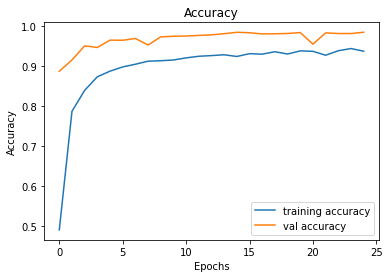

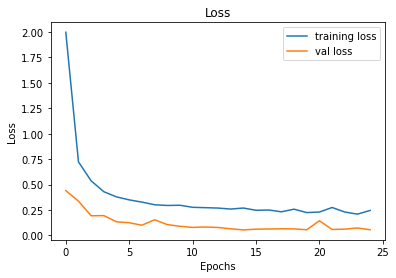

In [9]:
if __name__ == "__main__":
    import sys
    
    app = QtWidgets.QApplication(sys.argv)
    MainWindow = QtWidgets.QMainWindow()
    ui = Ui_MainWindow()
    ui.setupUi(MainWindow)
    MainWindow.show()
    sys.exit(app.exec_())

# 4. Validation

In [10]:
if __name__ == "__main__":
    import sys
    
    app = QtWidgets.QApplication(sys.argv)
    MainWindow = QtWidgets.QMainWindow()
    ui = Ui_MainWindow()
    ui.setupUi(MainWindow)
    MainWindow.show()
    sys.exit(app.exec_())

C:/Users/sami/Pantech/Day 21/dataset/Test/00001.png
Loading a model from the disk
C:/Users/sami/Pantech/Day 21/dataset/Test/00001.png
1
C:/Users/sami/Pantech/Day 21/dataset/Test/00006.png
Loading a model from the disk
C:/Users/sami/Pantech/Day 21/dataset/Test/00006.png
18
C:/Users/sami/Pantech/Day 21/dataset/Test/00009.png
Loading a model from the disk
C:/Users/sami/Pantech/Day 21/dataset/Test/00009.png
35


SystemExit: 0

C:\Users\sami\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3425: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# 5. End Results

- We have successfully trained the Traffic Sign Detection Model using CNN.
- We got accuracy of about **93.79%** on training data while **98.53** on validation data. This shows that our model is not over fitting & predicting the exact class to which it belongs.

# Thank You!!! 